# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
**Name = Abhishek Rathore**

# **Project Summary -**

Data from Rossman Stores has been provided to us, and it contains several variables that have an impact on the stores' sales. We'll talk about the project overview here.

After outlining our problem statement, we started by gathering our data, which included loading datasets from importing libraries, checking for duplicate values (neither dataset contained any), and checking for null values (there were none in the Store dataset but there were some in the Rossman dataset).
Then, we learned how to interpret our variables, which also included their descriptions and unique values.
Then, we moved on to Data Wrangling, which involves handling null values with the aid of looking for outliers. Second, two datasets were combined. After that, we typecast.

At that point, we did information visualization to get the relationship between the variables.

After that, we performed feature engineering and data pre-processing, which included addressing missing values (we discovered none), handling outliers, categorical encoding, and other tasks. Next, feature manipulation and selection were performed. To create our final dataset, we computed VIF values. Then we scaled our data by using data scaling. As a result, the precision of the StandardScaler that we employed becomes more accurate.


Then we reached the main portion of the project, the ML Model Implementation, in which we used three different ML models: Linear Regression (including Lasso, Ridge, and Elastic Net), Decision Tree, and Random Forest. Of the three models, Random Forest proved to be the most successful, providing the most accurate result (98%).


# **GitHub Link -**

github.com/Abhishek6481/Retail-Sales-Prediction-

# **Problem Statement**



Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann Stores, The task is to forecast the "Sales" column for the test set. Note that some Stores in the dataset were temporarily closed for refurbishment.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

# Data Preprocessing
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Hyperparameter Technique
from sklearn.model_selection import GridSearchCV




### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = '/content/drive/MyDrive/sales retail/'
rossmann = pd.read_csv( dir_path + 'Rossmann Stores Data.csv')
store = pd.read_csv(dir_path + 'store.csv')

<ipython-input-5-862bc34128af>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann = pd.read_csv( dir_path + 'Rossmann Stores Data.csv')


### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

In [ ]:
print(f'Rossmann = {rossmann.shape[0]} Rows , {rossmann.shape[1]} columns.')

Rossmann = 1017209 Rows , 9 columns.


In [ ]:
print(f'Store = {store.shape[0]} Rows , {store.shape[1]} columns.')

Store = 1115 Rows , 10 columns.


### Dataset Information

In [ ]:
# Dataset Info

In [ ]:
rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

In [ ]:
rossmann.duplicated().sum()

0

In [ ]:
store.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
rossmann.isnull().sum().sort_values(ascending = False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
store.isnull().sum().sort_values(ascending = False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

In [ ]:
# Visualizing the missing values

In [ ]:
import missingno as msno

<Axes: >

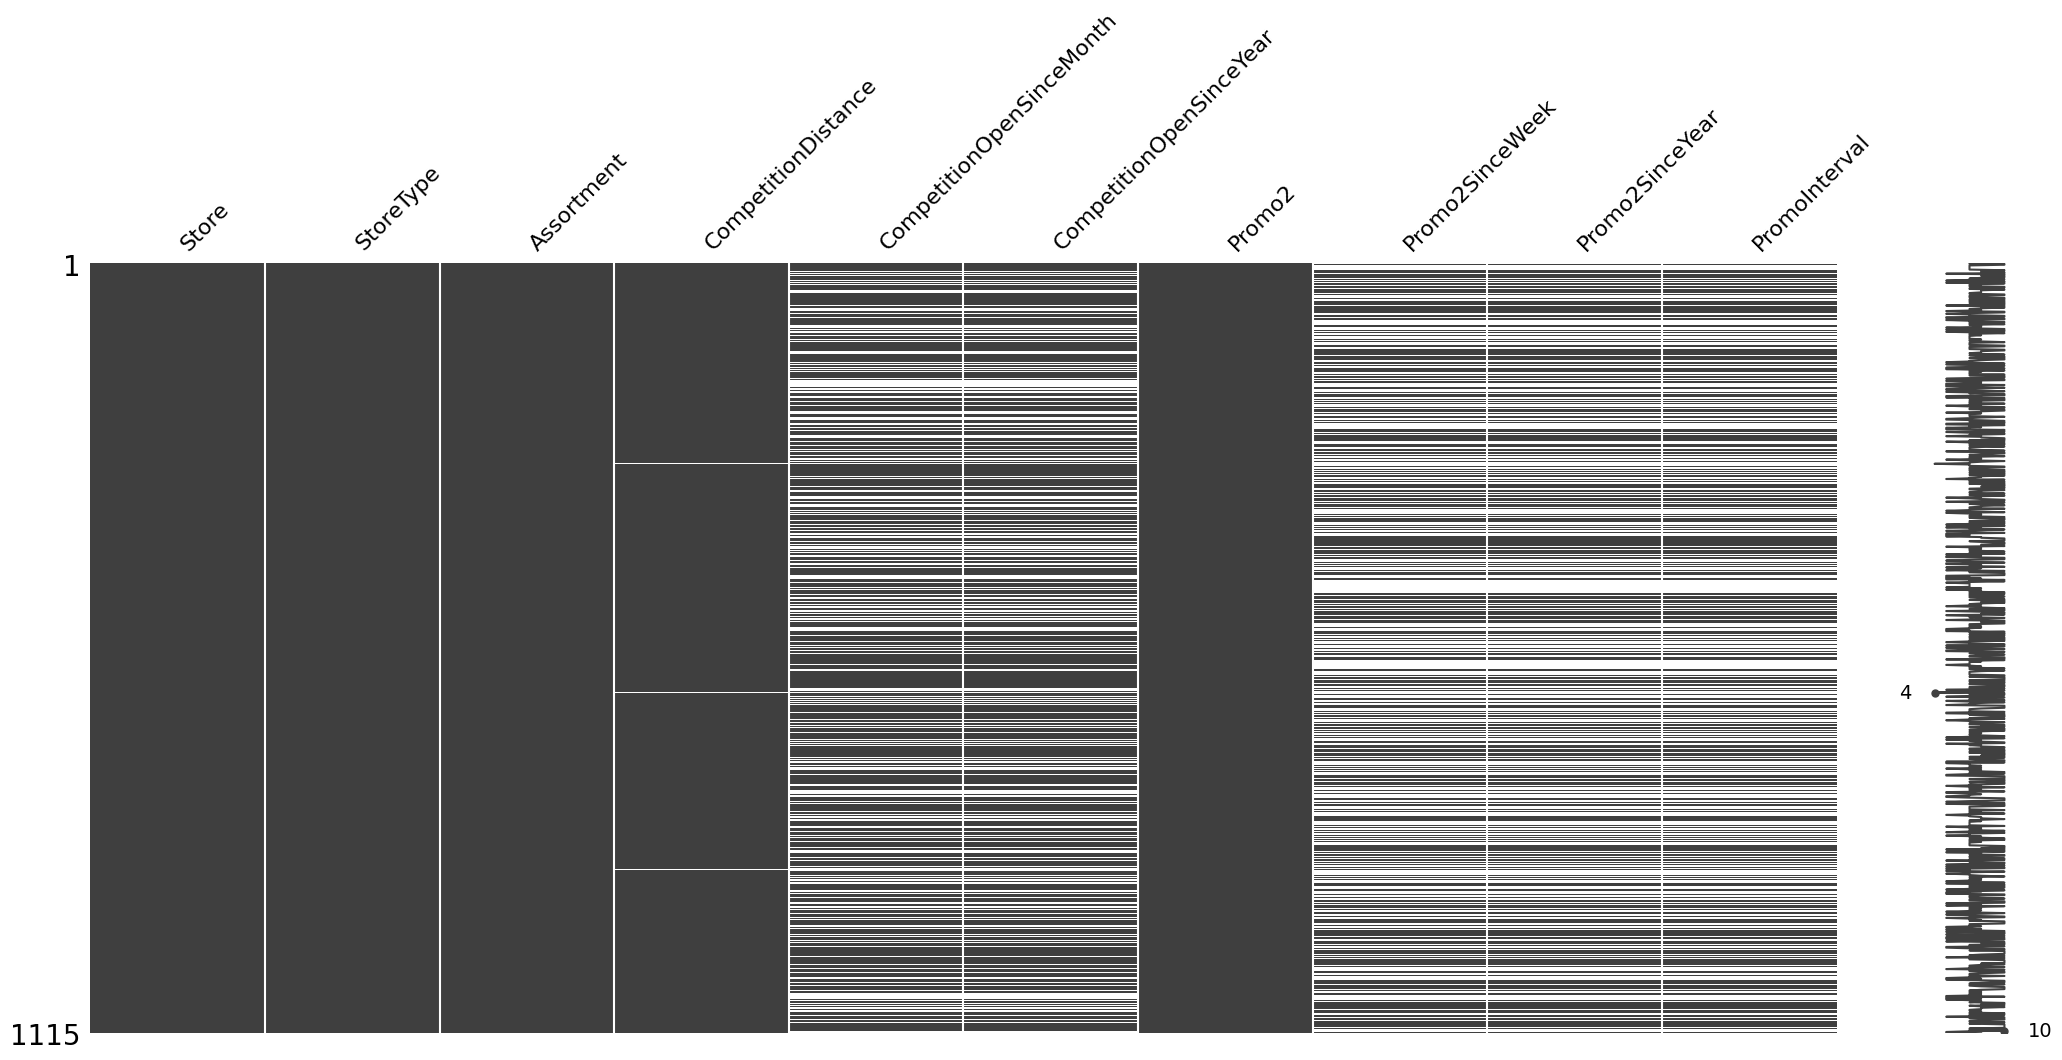

In [ ]:
msno.matrix(store)

<Axes: >

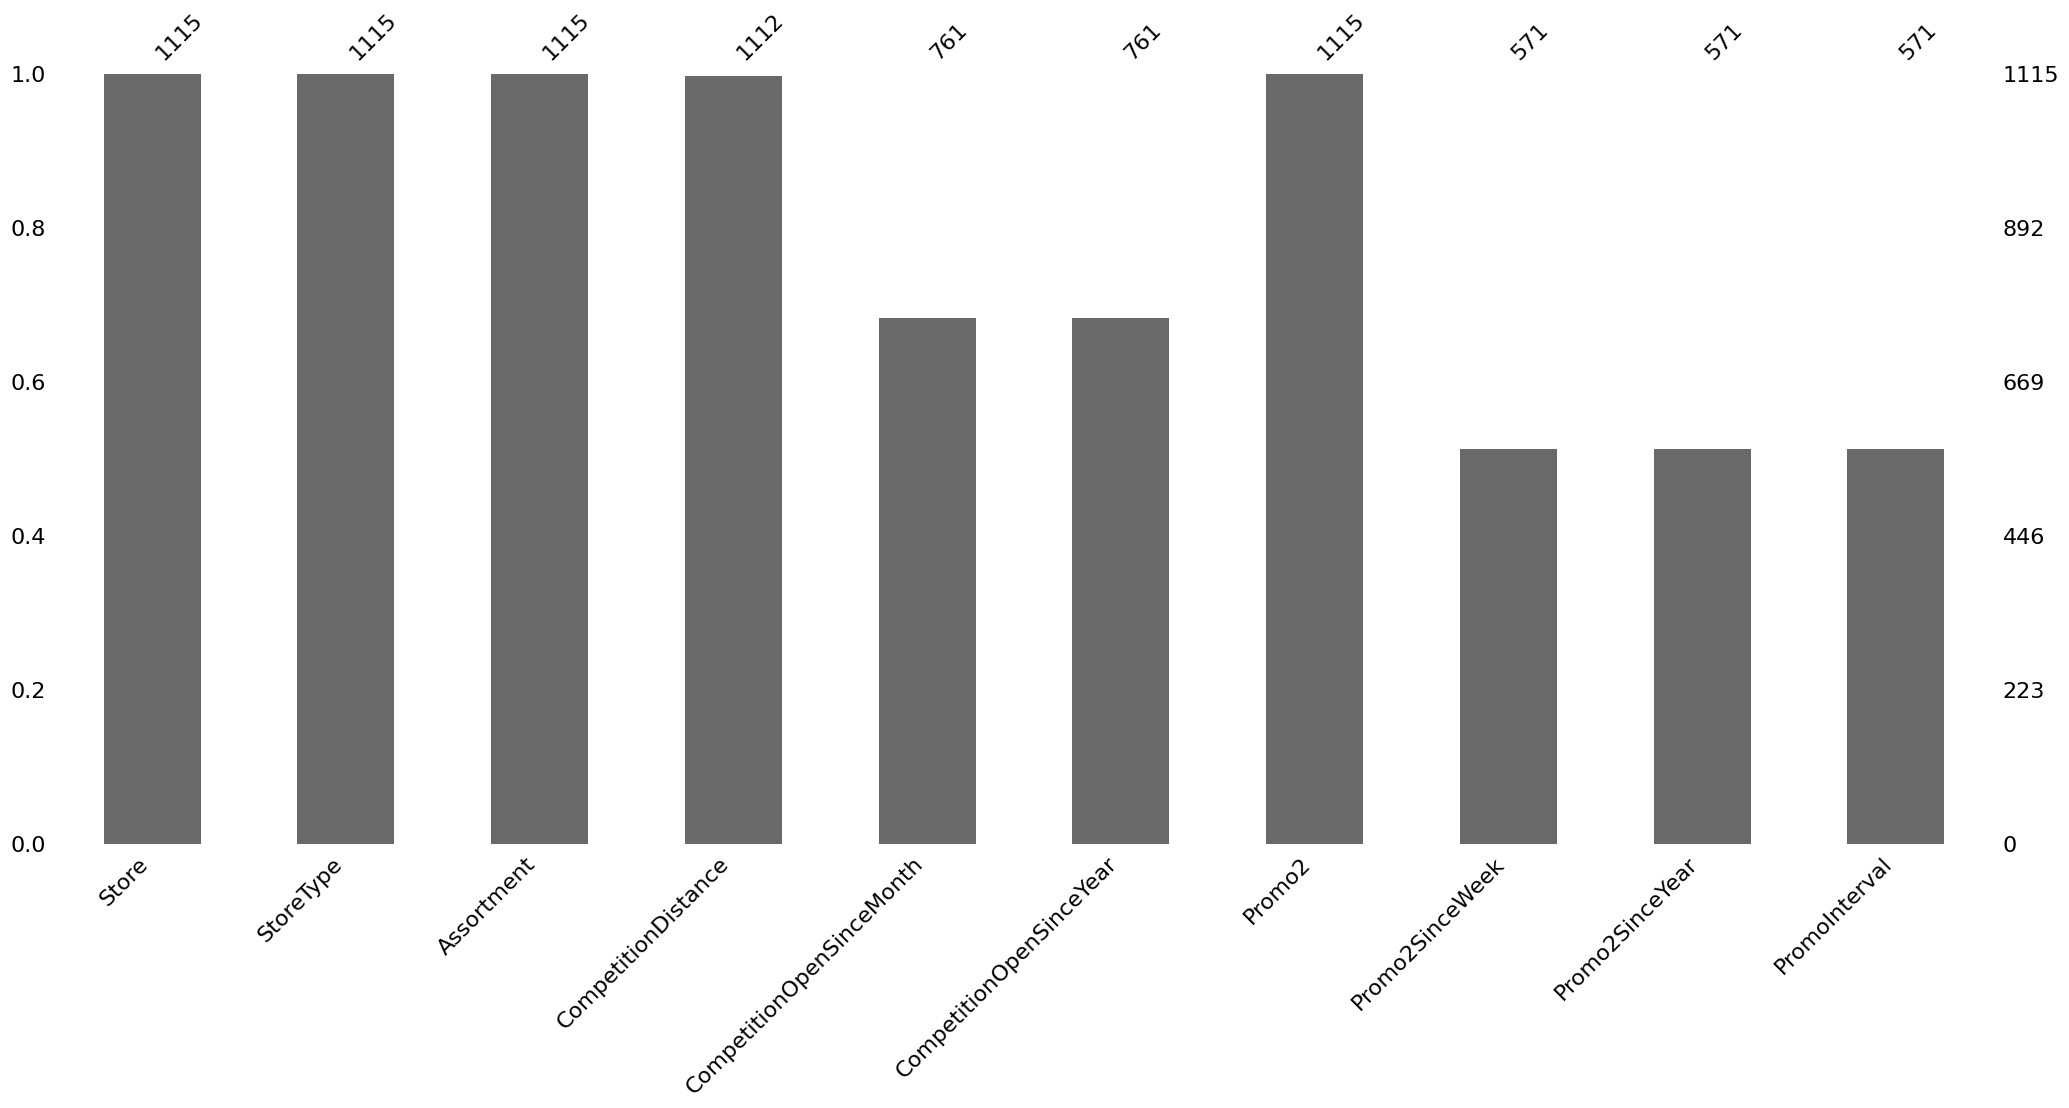

In [ ]:
msno.bar(store)

### What did you know about your dataset?

We have a Dataset of Rossmann Stores which contain 1017209 rows and 18 colums. Some columns have missing values.


*   CompetitionDistance have 3 null Values
*   CompetitionOpenSinceMonth and CompetitionOpenSinceYear have 354 null values.
*   Promo2SinceWeek ,Promo2SinceYear and PromoInterval have 544 null values.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
rossmann.keys()

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
store.keys()

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe

In [ ]:
rossmann.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

**Rossmann Stores Data.csv** - historical data including Sales

**Store.csv** - supplemental information about the stores

Data Fields

 1. Id - an Id that represents a (Store, Date) duple within the test set
 2. Store - a unique Id for each store
 3. Sales - the turnover for any given day (this is what you are predicting)
 4. Customers - the number of customers on a given day
 5. Open - an indicator for whether the store was open: 0 = closed, 1 = open
 6. StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
 7. SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
 8. StoreType - differentiates between 4 different store models: a, b, c, d
 9. Assortment - describes an assortment level: a = basic, b = extra, c = extended
 10. CompetitionDistance - distance in meters to the nearest competitor store
 11. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
 12. Promo - indicates whether a store is running a promo on that day
 13. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
 14. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
 15. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in rossmann.columns:
  if col in ['Sales','CompetitionDistance','Date']:
    continue
  else:
    print(f'The unique values in column {col} are',rossmann[col].unique())


The unique values in column Store are [   1    2    3 ... 1113 1114 1115]
The unique values in column DayOfWeek are [5 4 3 2 1 7 6]
The unique values in column Customers are [ 555  625  821 ... 3900   36 4065]
The unique values in column Open are [1 0]
The unique values in column Promo are [1 0]
The unique values in column StateHoliday are ['0' 'a' 'b' 'c' 0]
The unique values in column SchoolHoliday are [1 0]


In [ ]:
for col in store.columns:
  if col in ['Sales','CompetitionDistance','Date']:
    continue
  else:
    print(f'The unique values in column {col} are',store[col].unique())


The unique values in column Store are [   1    2    3 ... 1113 1114 1115]
The unique values in column StoreType are ['c' 'a' 'd' 'b']
The unique values in column Assortment are ['a' 'c' 'b']
The unique values in column CompetitionOpenSinceMonth are [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
The unique values in column CompetitionOpenSinceYear are [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
The unique values in column Promo2 are [0 1]
The unique values in column Promo2SinceWeek are [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
The unique values in column Promo2SinceYear are [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
The unique values in column PromoInterval are [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
rossmann.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [ ]:
store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# Merge Dataset
df = pd.merge(rossmann, store, how='left', on='Store')

In [ ]:
df['year'] = df['Date'].apply(lambda x : x.split('-')[0])
df['month'] = df['Date'].apply(lambda x : x.split('-')[1])
df['date'] = df['Date'].apply(lambda x : x.split('-')[2])

In [ ]:
del df['Date']

In [ ]:
result = df.groupby(['month'],as_index=False).agg({'Sales':"sum"})
print(result)

   month      Sales
0     01  566728724
1     02  528734410
2     03  599831906
3     04  575895295
4     05  569248217
5     06  578112775
6     07  595059205
7     08  361791202
8     09  342570131
9     10  351878728
10    11  369498877
11    12  433831153


In [ ]:
df['Promo2SinceWeek'].fillna(0, inplace = True)
df['Promo2SinceYear'].fillna(0, inplace = True)
df['PromoInterval'].fillna(0, inplace = True)


In [ ]:
df.loc[df['StateHoliday'] == '0' , 'StateHoliday']=0

In [ ]:
df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07,31


### **What all manipulations have you done and insights you found?**



*   First I merges Both Data Set Rossmann or Store
*   then after merge dataset we make date, month and year separate column and drop Date Columns From Dataset
*  Check Sales in a month using groupby method
*  Promo2SinceWeek ,Promo2SinceYear and PromoInterval fill null value with 0
*  Stateholiday has 5 unique values 0 ,0 a, b,and c we merge both 0 make and one 0



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

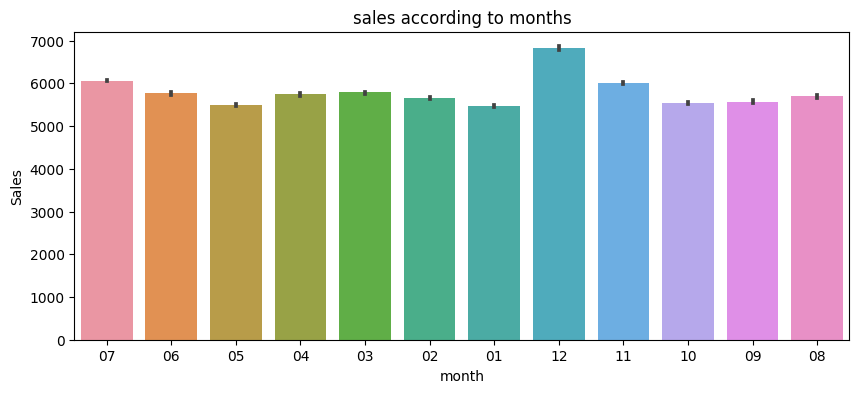

In [ ]:
# Chart - 1 visualization code
fig,ax=plt.subplots(figsize=(10,4))
sns.barplot(data=df , x='month' , y = 'Sales' , ax=ax)
ax.set(title = 'sales according to months')
plt.show()

##### 1. Why did you pick the specific chart?
Bar chart are easy to understand and to create

##### 2. What is/are the insight(s) found from the chart?


Sales are highest during three month of the year i.e.,July, November and December and least sales are during the month of May

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

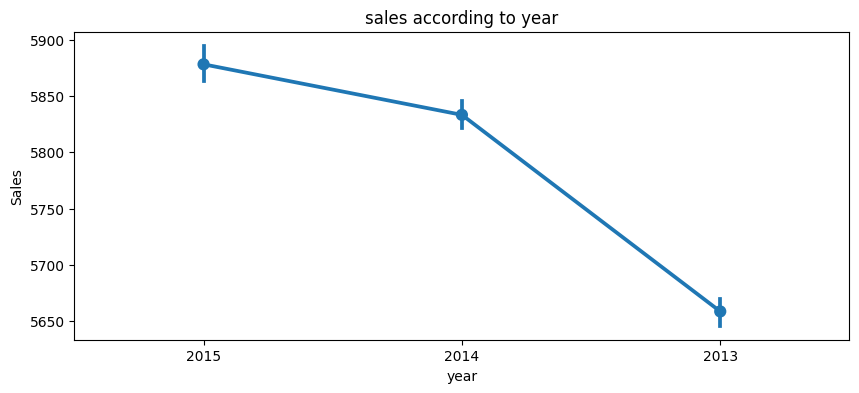

In [ ]:
fig,ax=plt.subplots(figsize=(10,4))
sns.pointplot(data=df , x='year' , y = 'Sales' , ax=ax)
ax.set(title = 'sales according to year')
plt.show()

##### 1. Why did you pick the specific chart?

This plotchart shows relation between years

##### 2. What is/are the insight(s) found from the chart?

Sales are  increasingly year by year 2013 has less sales,in 2014 Sales Up  Sales bit increase in 2015.


#### Chart - 3

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1500x800 with 0 Axes>

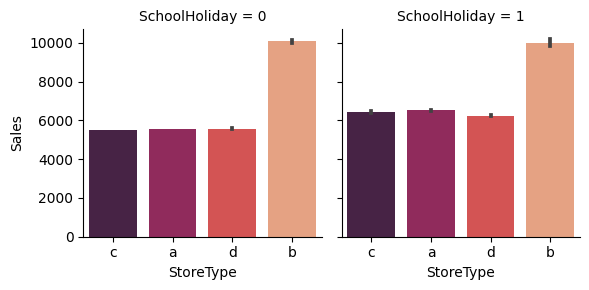

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize = (15,8))
g = sns.FacetGrid(df, col="SchoolHoliday")
g.map(sns.barplot, "StoreType", "Sales",palette= "rocket");
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are generally used to help avoid clutter when one data label is long or if you have more than 10 items to compare

##### 2. What is/are the insight(s) found from the chart?

School close = 0

School open =  1

Sales are drop when School closes.

Sales are increase  when school opens.



#### Chart - 4

In [ ]:
# Chart - 4 visualization code

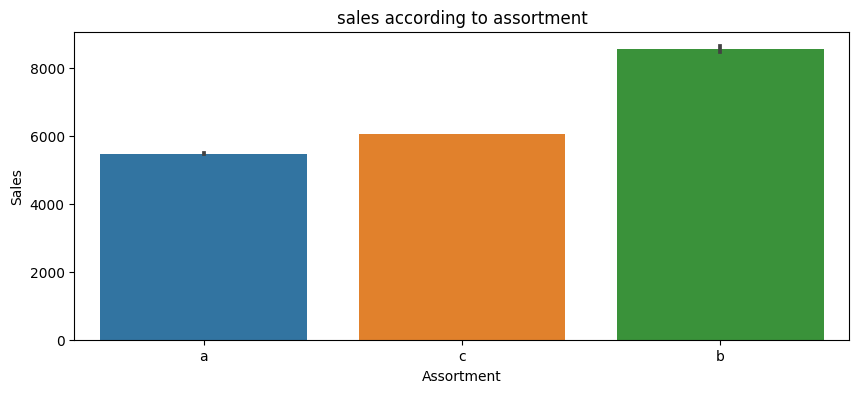

In [ ]:
fig,ax=plt.subplots(figsize=(10,4))
sns.barplot(data=df , x='Assortment' , y = 'Sales' , ax=ax)
ax.set(title = 'sales according to assortment')
plt.show()

##### 1. Why did you pick the specific chart?

Bar and column charts are used to compare different items.

##### 2. What is/are the insight(s) found from the chart?

Most of the sales of **B (extra)** type of assortment and sales of **C** assortment more than **A**

---



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As sales is highest for assortment_b so we could invest our efforts more on this rather than assortment_a and assortment_c to increase the sales

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

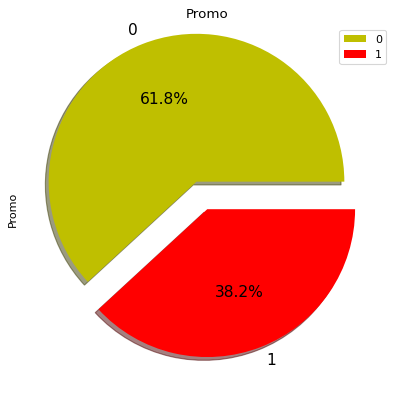

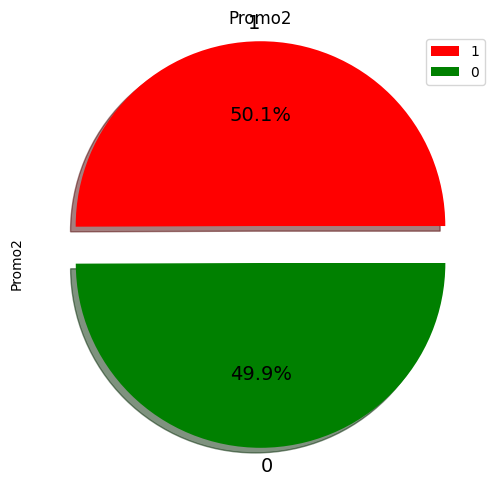

In [ ]:
plt.figure(figsize=(12,7), dpi=80)

labels = 'Not Promo','Promo'
df['Promo'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode = (0.2, 0.0), colors = ['y','red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
plt.title("Promo")
fig=plt.gcf()
plt.legend(loc="best")
fig.set_size_inches(6,6)
plt.show()

df['Promo2'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode = (0.2, 0.0),colors = ['red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
label= 'Not Promo','Promo'
plt.title("Promo2")
fig=plt.gcf()
plt.legend(loc="best")
fig.set_size_inches(6,6)

##### 1. Why did you pick the specific chart?

A pie chart represents numbers in percentages, and the total sum of all the divided segments equals 100 percent



##### 2. What is/are the insight(s) found from the chart?



In promo - 61.8 % running stores are not participating in promo.

In promo 2 - only 50.1 % stores are continueing participate in Promo.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If Stores are participating in Promo Sales will increase further.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

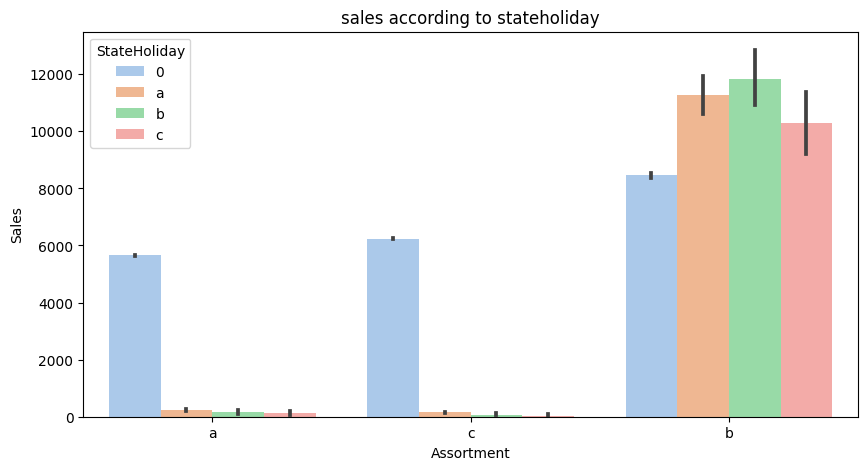

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df , x='Assortment' , y = 'Sales' ,hue = 'StateHoliday' , ax=ax , palette = 'pastel')
ax.set(title = 'sales according to stateholiday')
plt.show()

##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

##### 2. What is/are the insight(s) found from the chart?

Sales are maximum during the Public Holidays, where are during the religious occassions, like Easter or Christmas, the sales are lower , most of sales of B type assortment of all Holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business can create special offers or bundle products to increase the sales during the religious festivals, or they can decide to remain close during these festivals to reduce running cost or expenses.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

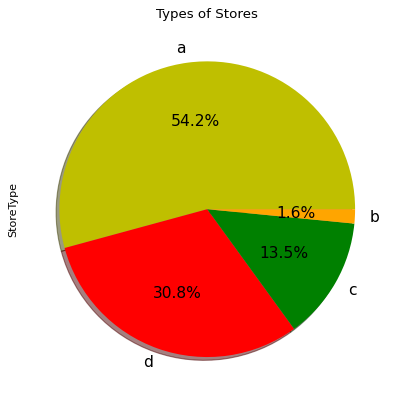

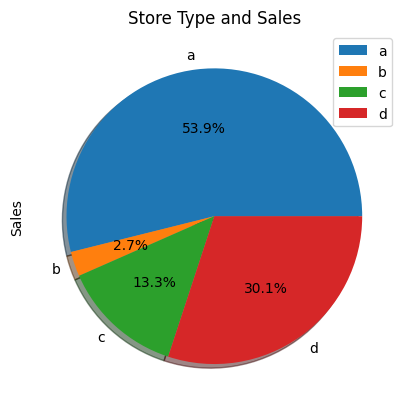

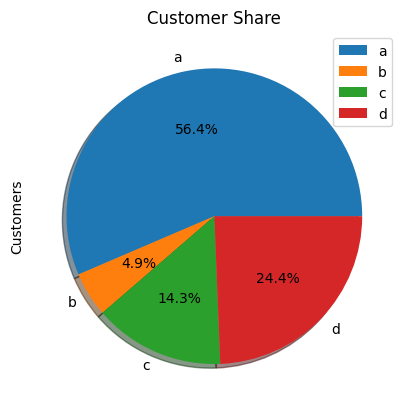

In [ ]:
plt.figure(figsize=(12,7), dpi=80)

df['StoreType'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors = ['y','red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
plt.title("Types of Stores")
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()



##### 1. Why did you pick the specific chart?

A pie chart represents numbers in percentages, and the total sum of all the divided segments equals 100 percent

##### 2. What is/are the insight(s) found from the chart?

As my observation there are 4 types of stores A ,B, C and D



* But upon further exploration it can be clearly observed that the highest sales belonged to the store type **A** due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Increase number of stores like b , c, and also d type stores only A type of stores spread everywhere

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

Text(0.5, 1.0, 'Store Daily Promo Countplot')

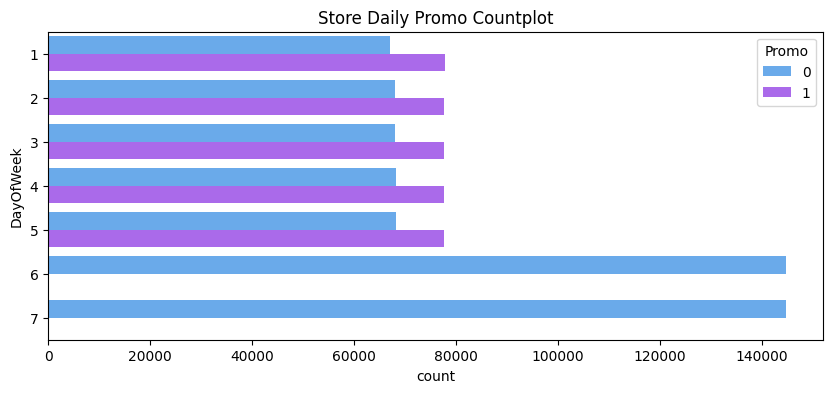

In [ ]:
plt.figure(figsize = (10,4))
sns.countplot(y= 'DayOfWeek', hue='Promo', data= df, palette= 'cool')
plt.title('Store Daily Promo Countplot')

##### 1. Why did you pick the specific chart?

They are easy to understand and to create.

##### 2. What is/are the insight(s) found from the chart?

First 5 day of week promotion in stores,only weekend no promotion in stores

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

Text(0.5, 1.0, 'according week of days store open or close')

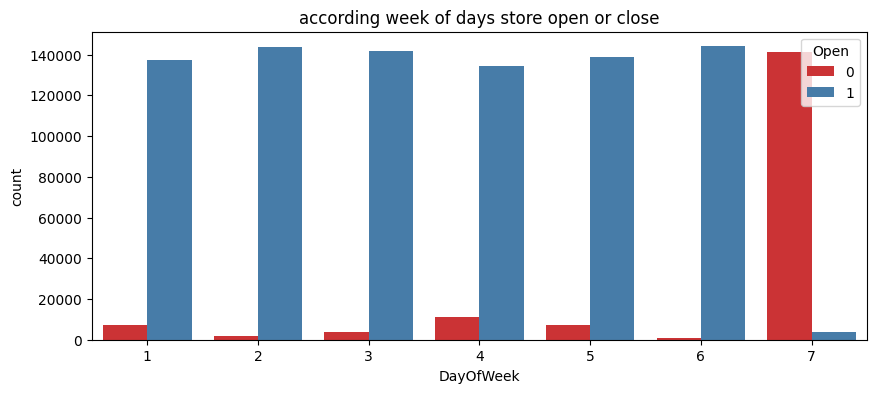

In [ ]:
plt.figure(figsize = (10,4))
sns.countplot( x='DayOfWeek', data=df, hue="Open", palette="Set1")
plt.title('according week of days store open or close')

##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

##### 2. What is/are the insight(s) found from the chart?

In this barchart clear show on sunday most of the stores are closes and other day day all stores are opens.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the stores are closes on sunday if 60 % stores are open on sunday, positive impect on sales

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

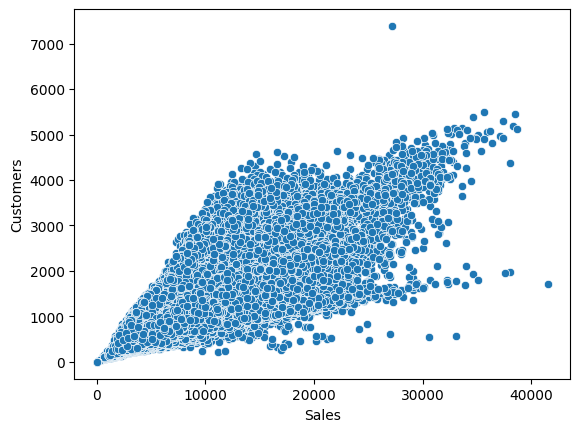

In [ ]:
sns.scatterplot(data=df, x="Sales", y="Customers")
plt.show()

##### 1. Why did you pick the specific chart?

Here we have picked a scatter plot to know the relationship between numner of customers visitig stores and total sales

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is easy to observe that the correlation between customers and sales is preety good as customers are increasing sales are also healing upside.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


According to our graph customers and sales are highly correlated with each other which from the business point of view it is too good.

#### Chart - 11

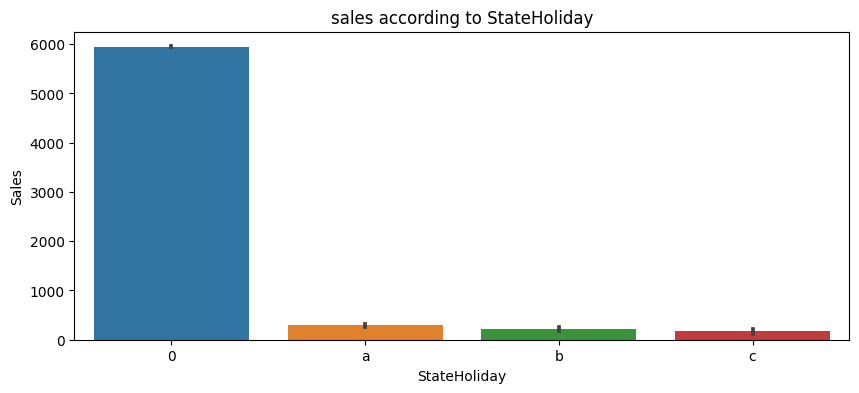

In [ ]:
fig,ax=plt.subplots(figsize=(10,4))
sns.barplot(data=df , x='StateHoliday' , y = 'Sales' , ax=ax)
ax.set(title = 'sales according to StateHoliday')
plt.show()

##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

##### 2. What is/are the insight(s) found from the chart?

Sales are maximum during the Public Holidays, where are during the religious occassions, like Easter or Christmas

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

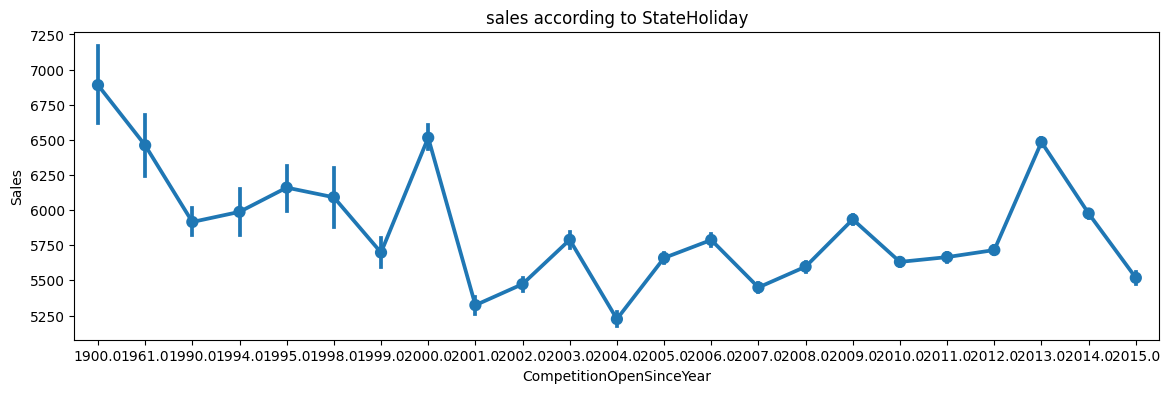

In [ ]:
fig,ax=plt.subplots(figsize=(14,4))
sns.pointplot(data=df , x='CompetitionOpenSinceYear' , y = 'Sales' , ax=ax)
ax.set(title = 'sales according to StateHoliday')
plt.show()

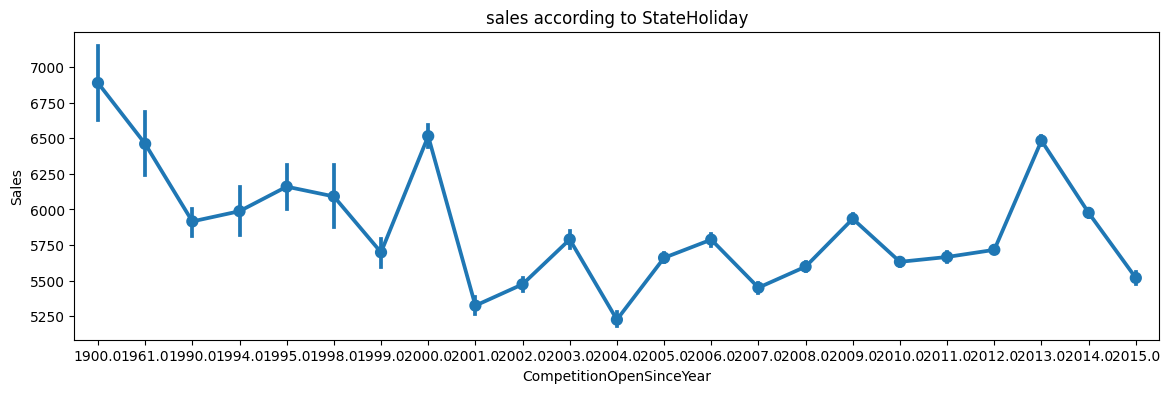

In [ ]:
fig,ax=plt.subplots(figsize=(14,4))
sns.pointplot(data=df , x='CompetitionOpenSinceYear' , y = 'Sales' , ax=ax)
ax.set(title = 'sales according to StateHoliday')
plt.show()

##### 1. Why did you pick the specific chart?

We picked this chart to know about the sales every year as there is competitor near the store.

##### 2. What is/are the insight(s) found from the chart?

From the graph it is clear that from year 1900 to 2000 sales was in good state but from 2000 there is downfall in sales. It might be due to less competitor during 1900 but gradually competitor increases and sales got affected

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graph we can observe that there is sudden increase and decrease in sales throughout the years. stores should grip some good and more effective strategy to increase the sales as more competitors are making more difficulties for the stores.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
numerical_values = list(df.describe().columns)
numerical_values

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

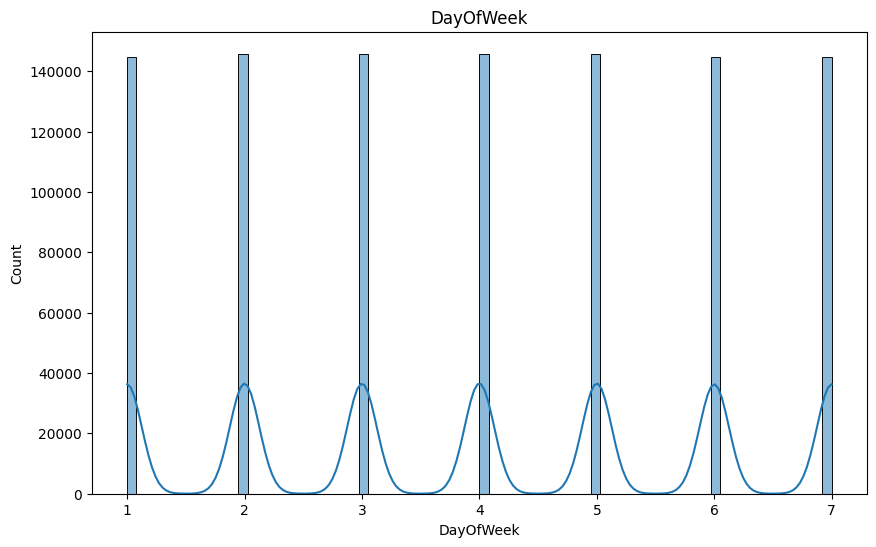

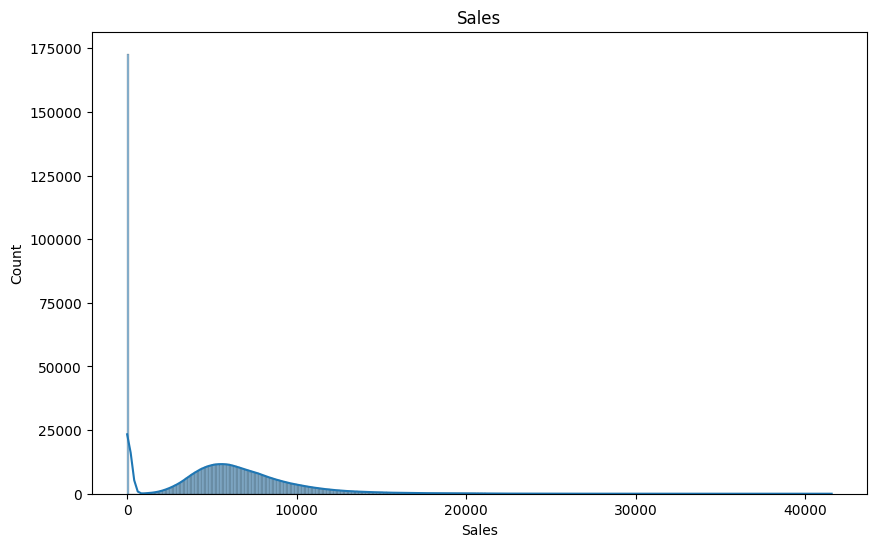

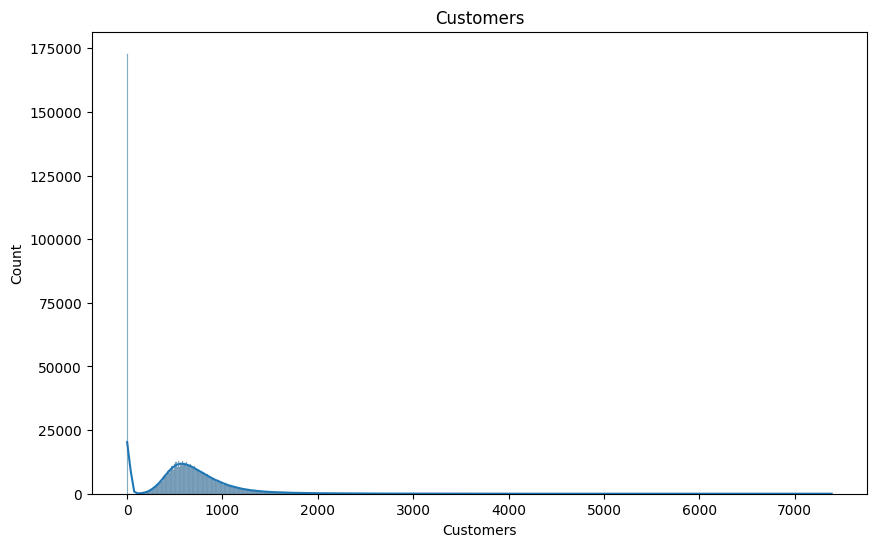

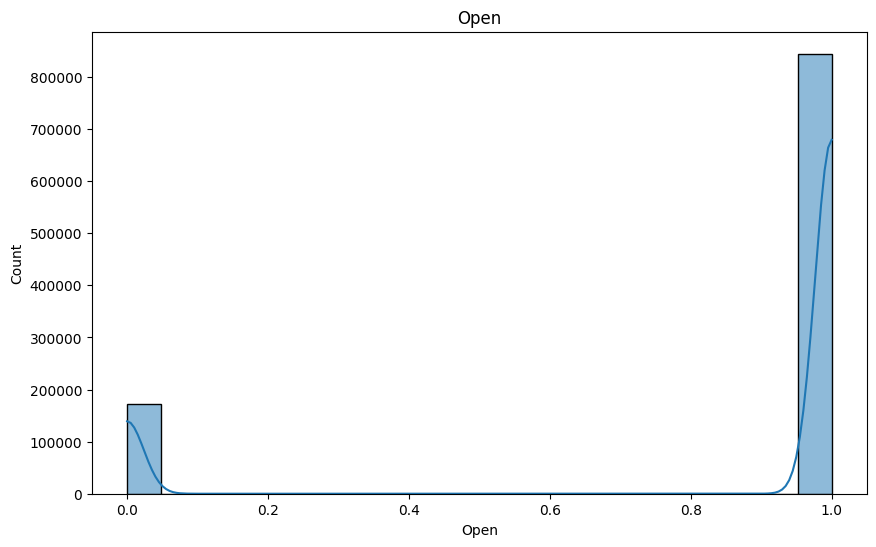

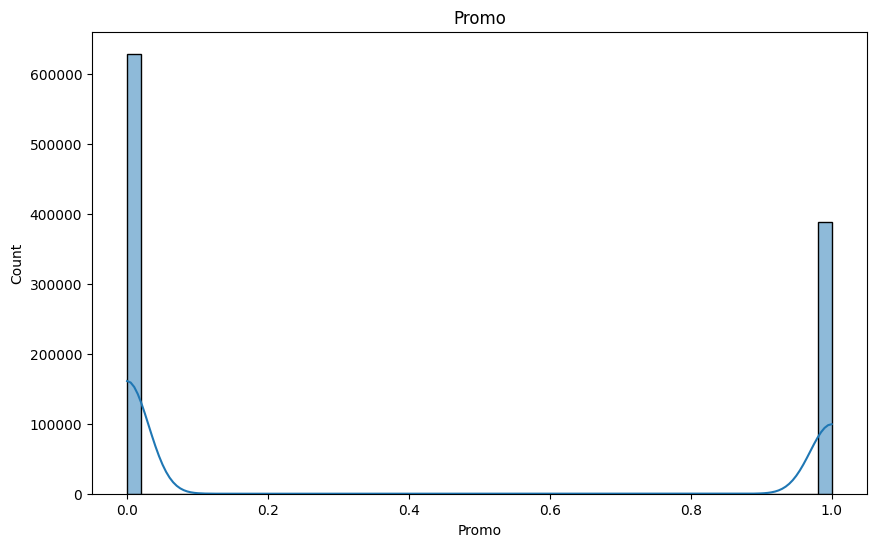

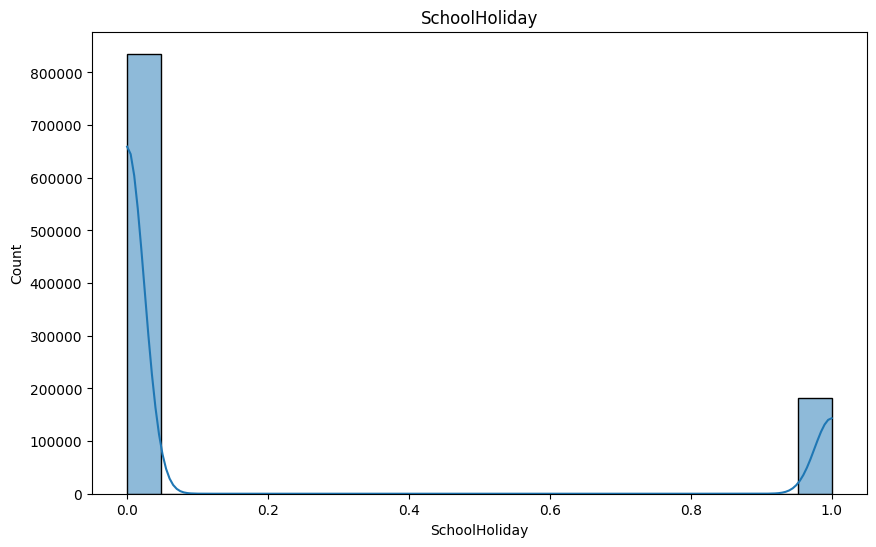

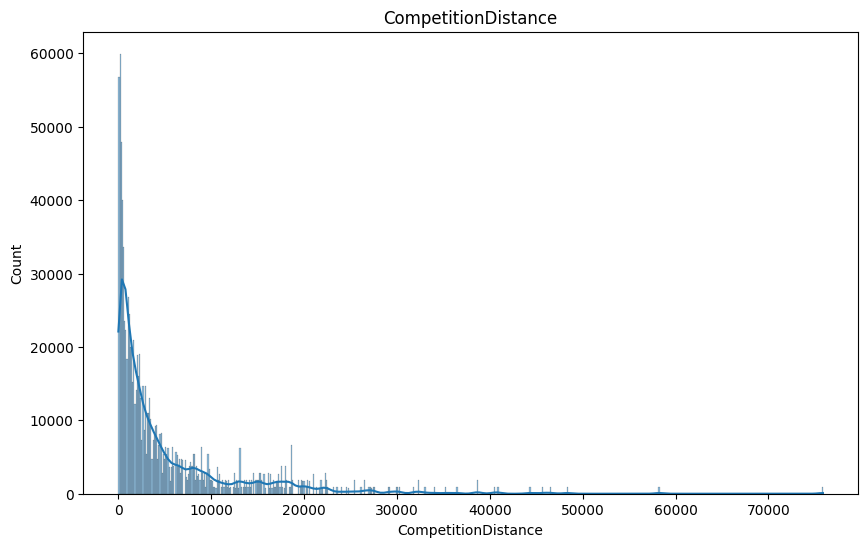

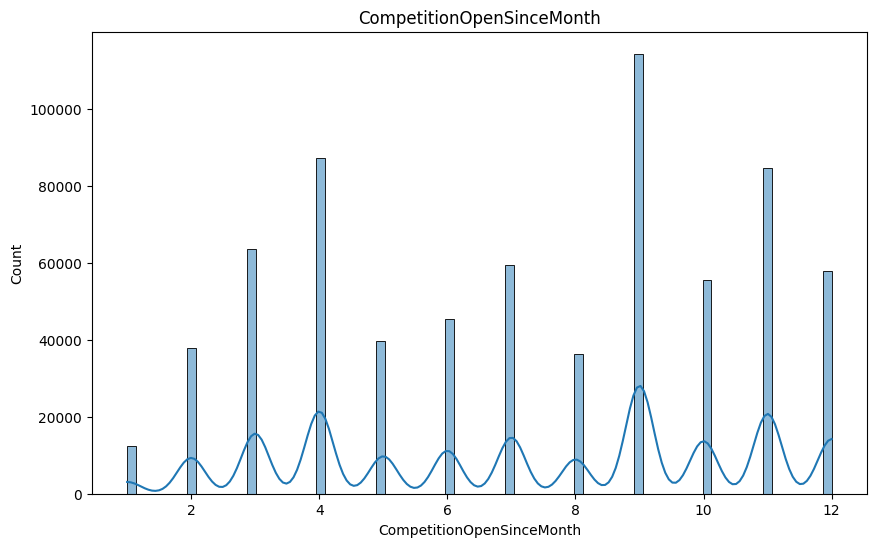

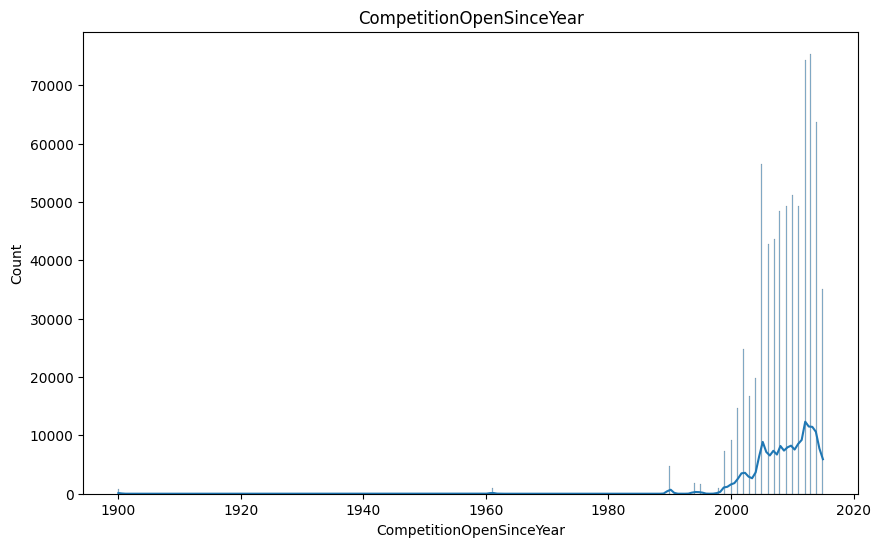

In [ ]:
for col in numerical_values[1:-3]:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  feature = df[col]
  sns.histplot(feature, ax = ax, kde=True)
  ax.set_title(col)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

now we can see that some of our features like CompititionDistance now more look like normal distribution. rest of our feature still not normaly distributed some of feature has multi mode. beacuse of some features have catagorical values like 1,0.

#### Chart - 14 - Correlation Heatmap

<ipython-input-68-2c1dae9e69be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


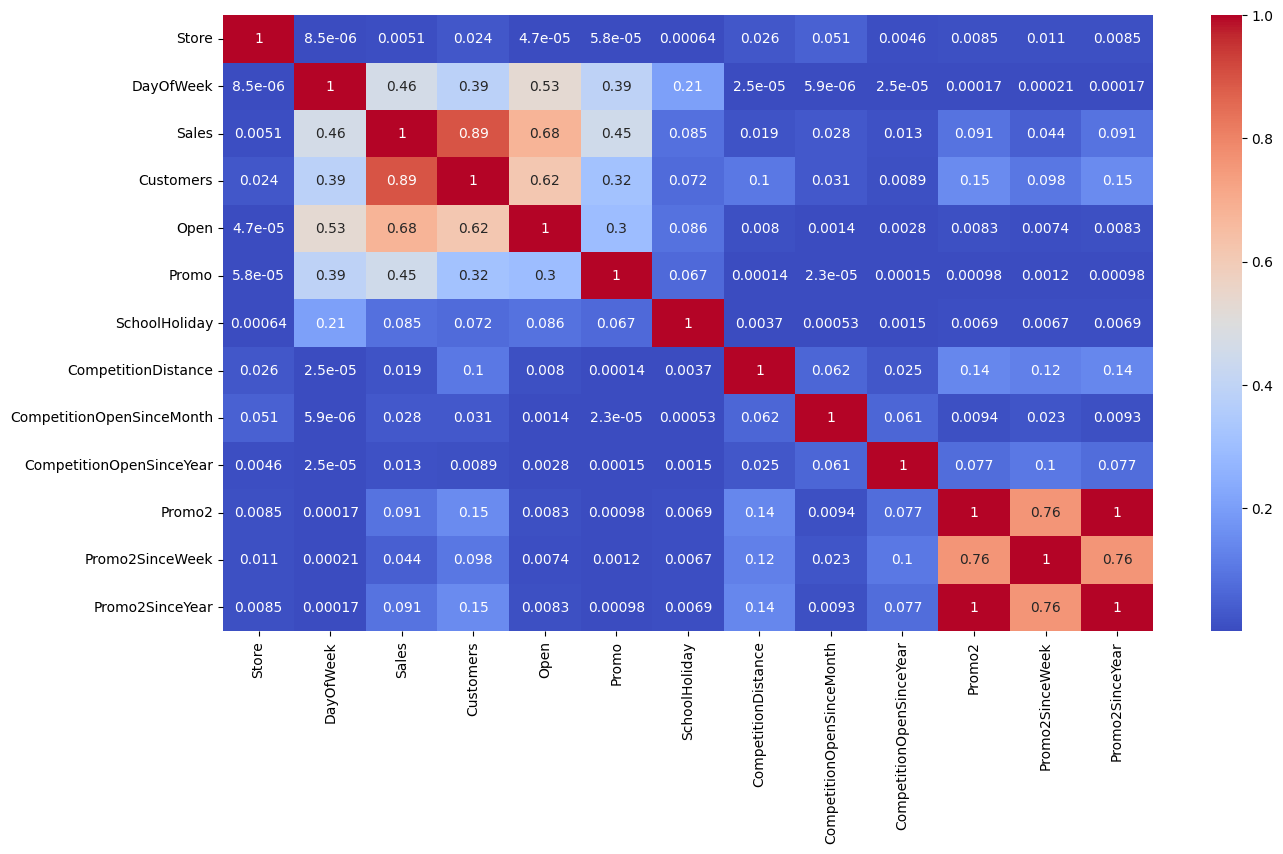

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap Show correlation between each Variables.

#### Chart - 15 - Pair Plot

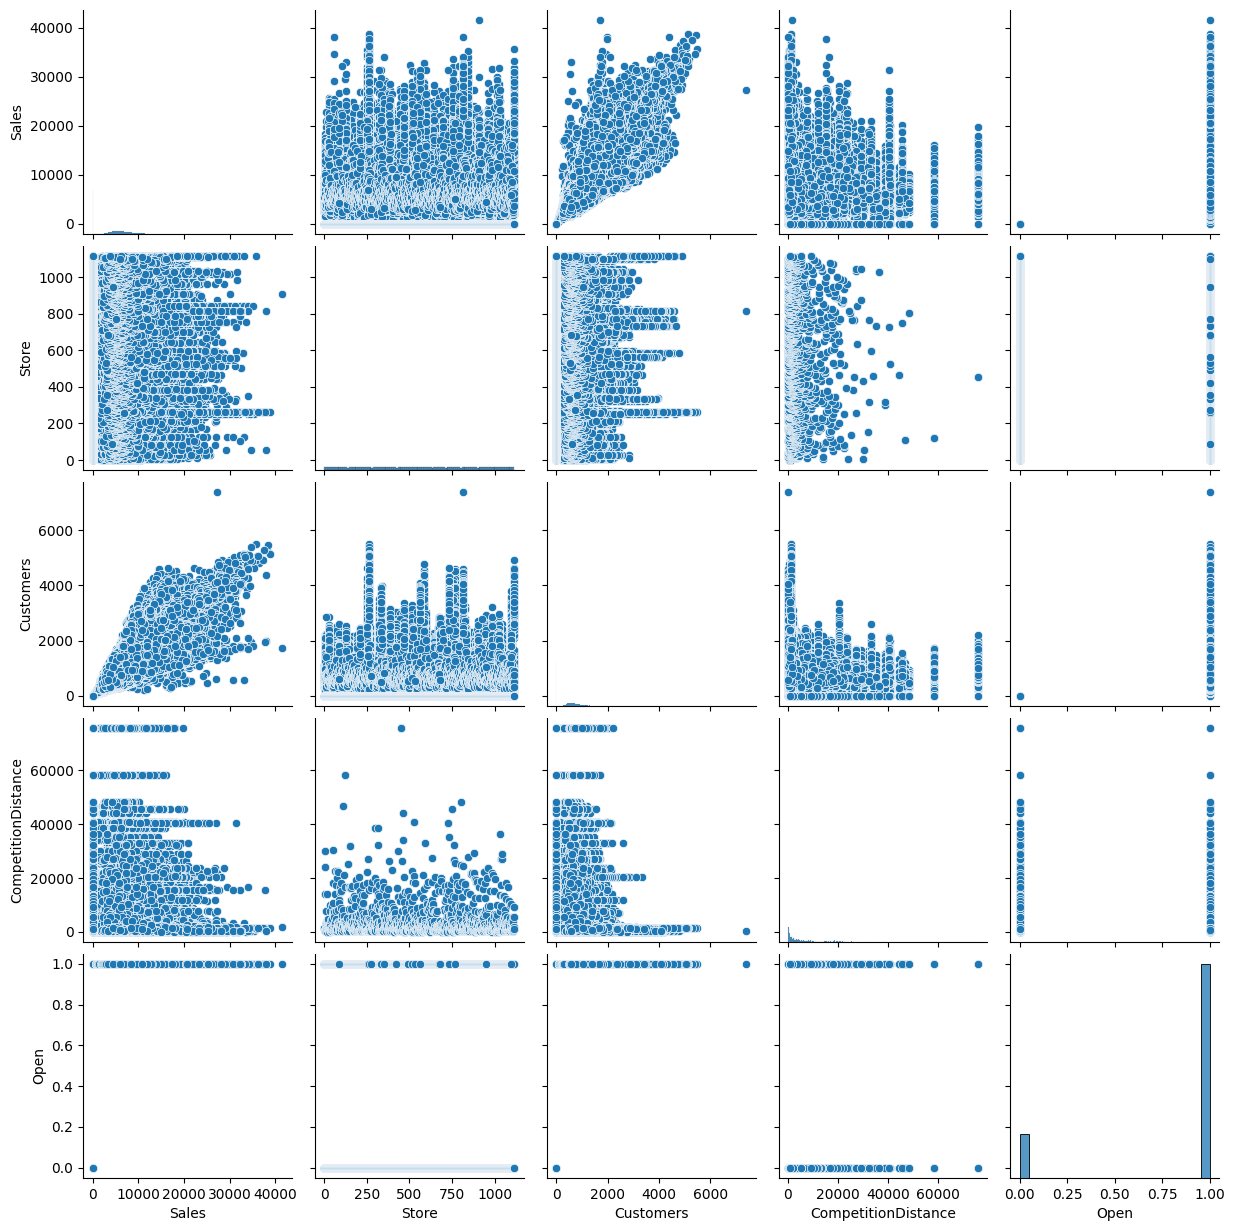

In [ ]:
# Pair Plot visualization code
Plot=df[['Sales','Store', 'Customers','CompetitionDistance', 'Open']]
sns.pairplot(Plot)
plt.show()

##### 1. Why did you pick the specific chart?

We picked this specific chart to plot for multiple visuals and various insights related to the data in a single frame.

##### 2. What is/are the insight(s) found from the chart?

 This Pairplot helps us to visualise the realtionship of five variable with the sales , store,like variable customer is establishing high correlation with the sales. and many more visualization in a single look.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
year                              0
month                             0
date                              0
dtype: int64

In [ ]:
print(df['CompetitionDistance'].isna().sum())
print(df['CompetitionOpenSinceMonth'].isna().sum())
print(df['CompetitionOpenSinceYear'].isna().sum())

2642
323348
323348


In [ ]:
# Handling Missing Values & Missing Value Imputation
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# Drop Some Columns
df.drop(['Promo2SinceWeek' ,'Promo2SinceYear' , 'PromoInterval'], axis = 1 , inplace = True)

In [ ]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
year                         0
month                        0
date                         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

#### What all missing value imputation techniques have you used and why did you use those techniques?

* We may have to drop these last 3 columns, Promo2SinceWeek, Promo2SinceYear, PromoInterval because they have around 50% of null values, but these null values shows that stores are not actually participating in promo2 that's why there are null values, so we have to replace it with 0
* To treat the missing values we have replaced those values using median and mode

### 2. Handling Outliers

In [ ]:
continuous_value_column = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'DayOfWeek',]

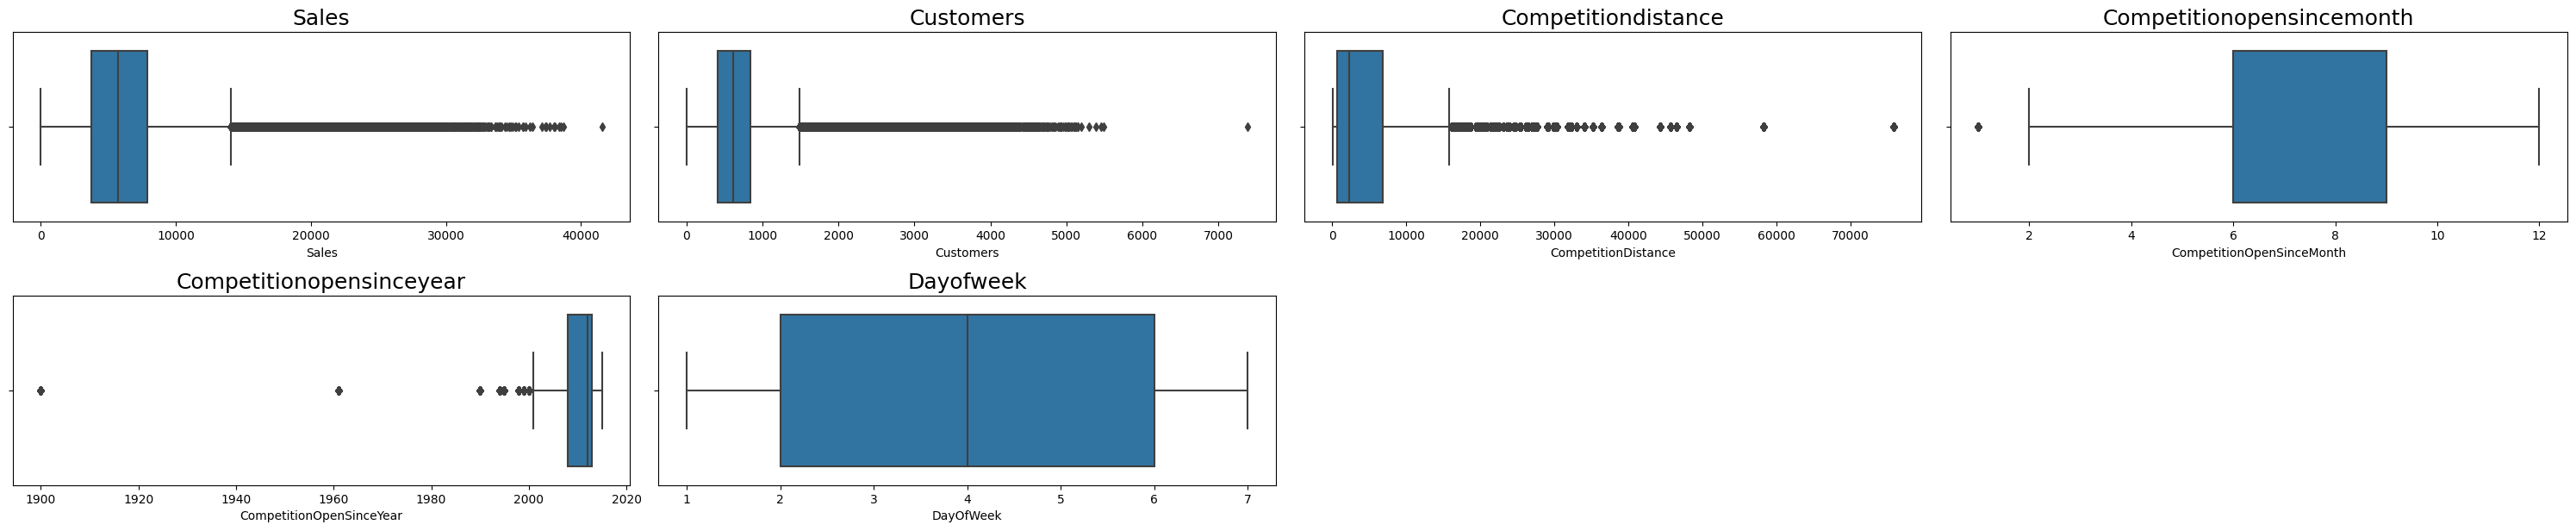

In [ ]:

plt.figure(figsize = (30,15))
for n, column in enumerate(continuous_value_column):
  plt.subplot(5,4,n+1)
  sns.boxplot(x =column, data = df).set_title(f'{column.title()}', fontsize = 18)
  plt.tight_layout()

In [ ]:
# IQR Technique to treat outliers
def iqr2_treat_outliers(data):
  # now calculating first and last quartile
  q1,q3 = np.percentile(data, [25,75])
  # now calculating interquartile range
  IQR = q3-q1
  # now the bounds
  Lower_bound = q1-(1.5*IQR)
  Upper_bound = q3+(1.5*IQR)
  # now the outliers
  Outliers = [x for x in data if x<Lower_bound or x>Upper_bound]
  # replacement with the nearest quartile
  data_treatment = [q1 if x<Lower_bound
                    else q3 if x>Upper_bound
                    else x for x in data]
  int_treateddata = [int (absolute) for absolute in data_treatment]

  return int_treateddata

In [ ]:
for column in continuous_value_column:
  df[column] = iqr2_treat_outliers(df[column])

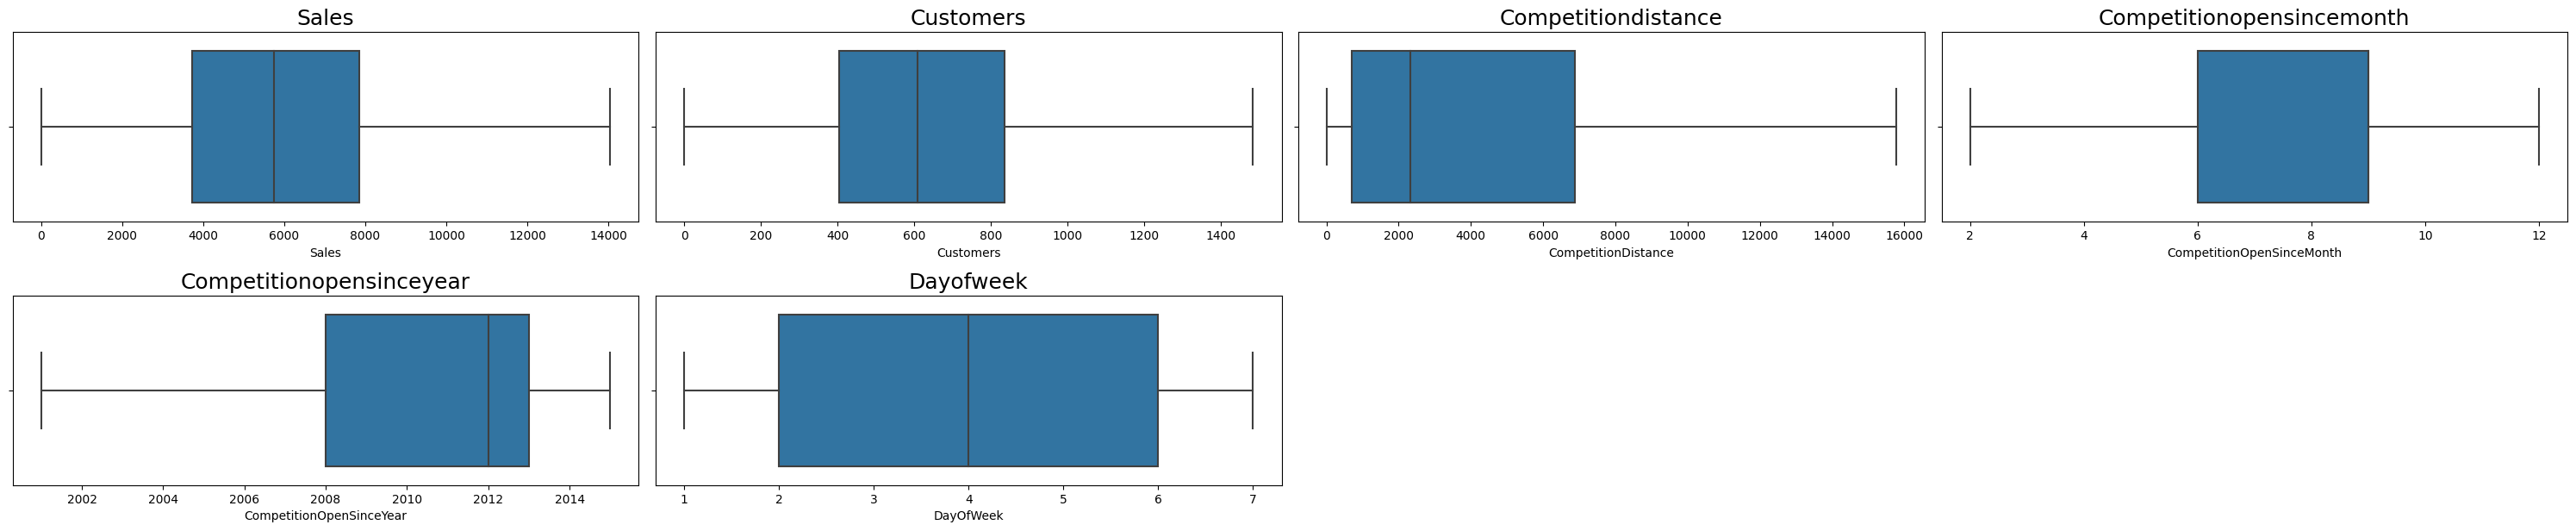

In [ ]:
# now rechecking outliers
# plotting box plot
plt.figure(figsize = (30,15))
for n, column in enumerate(continuous_value_column):
  plt.subplot(5,4,n+1)
  sns.boxplot(x =column, data = df).set_title(f'{column.title()}', fontsize = 18)
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used IQR Techniques to treat the outliers Because IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Sales                      1017209 non-null  int64 
 3   Customers                  1017209 non-null  int64 
 4   Open                       1017209 non-null  int64 
 5   Promo                      1017209 non-null  int64 
 6   StateHoliday               1017209 non-null  object
 7   SchoolHoliday              1017209 non-null  int64 
 8   StoreType                  1017209 non-null  object
 9   Assortment                 1017209 non-null  object
 10  CompetitionDistance        1017209 non-null  int64 
 11  CompetitionOpenSinceMonth  1017209 non-null  int64 
 12  CompetitionOpenSinceYear   1017209 non-null  int64 
 13  Promo2                     

In [ ]:
df['StoreType'] = np.where(df['StoreType'] == 'a',0,df['StoreType'])
df['StoreType'] = np.where(df['StoreType'] == 'b',1,df['StoreType'])
df['StoreType'] = np.where(df['StoreType'] == 'c',2,df['StoreType'])
df['StoreType'] = np.where(df['StoreType'] == 'd',3,df['StoreType'])

In [ ]:
df['StoreType'].unique()

array([2, 0, 3, 1], dtype=object)

In [ ]:
df['Assortment'] = np.where(df['Assortment'] == 'a',0,df['Assortment'])
df['Assortment'] = np.where(df['Assortment'] == 'b',1,df['Assortment'])
df['Assortment'] = np.where(df['Assortment'] == 'c',2,df['Assortment'])

In [ ]:
df['Assortment'].unique ()

array([0, 2, 1], dtype=object)

In [ ]:
# one Hot coding
df.loc[df['StateHoliday'] == '0' , 'StateHoliday']=0
df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# one Hot Coding
df = pd.get_dummies(df,columns=['StateHoliday'],drop_first= True)

In [ ]:
# Change Datatype Object into Integers
df['date'] = df['date'].astype(int)
df['year'] = df['year'].astype(int)
df['StoreType'] = df['StoreType'].astype(int)
df['Assortment'] = df['Assortment'].astype(int)
df['month'] = df['month'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Store                      1017209 non-null  int64
 1   DayOfWeek                  1017209 non-null  int64
 2   Sales                      1017209 non-null  int64
 3   Customers                  1017209 non-null  int64
 4   Open                       1017209 non-null  int64
 5   Promo                      1017209 non-null  int64
 6   SchoolHoliday              1017209 non-null  int64
 7   StoreType                  1017209 non-null  int64
 8   Assortment                 1017209 non-null  int64
 9   CompetitionDistance        1017209 non-null  int64
 10  CompetitionOpenSinceMonth  1017209 non-null  int64
 11  CompetitionOpenSinceYear   1017209 non-null  int64
 12  Promo2                     1017209 non-null  int64
 13  year                       1017209 non-nul

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Using Numpy Function we Changed String Values to Categorical Values (Store and Assortment) and Using Dummification Techniques in (Stateholiday) Column .

* And using Astype function Convert Object to Integer.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
numerical_values = list(df.describe().columns)
numerical_values

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'year',
 'month',
 'date',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

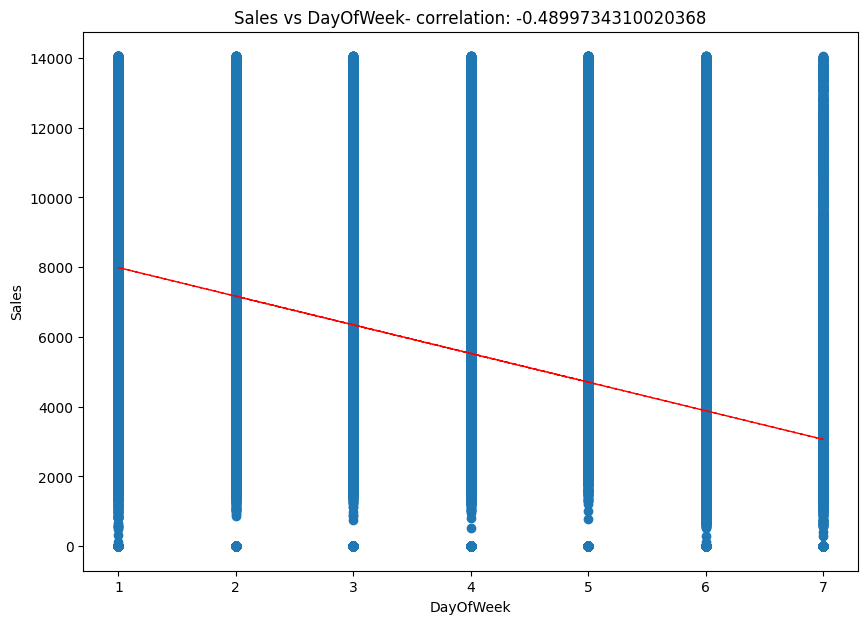

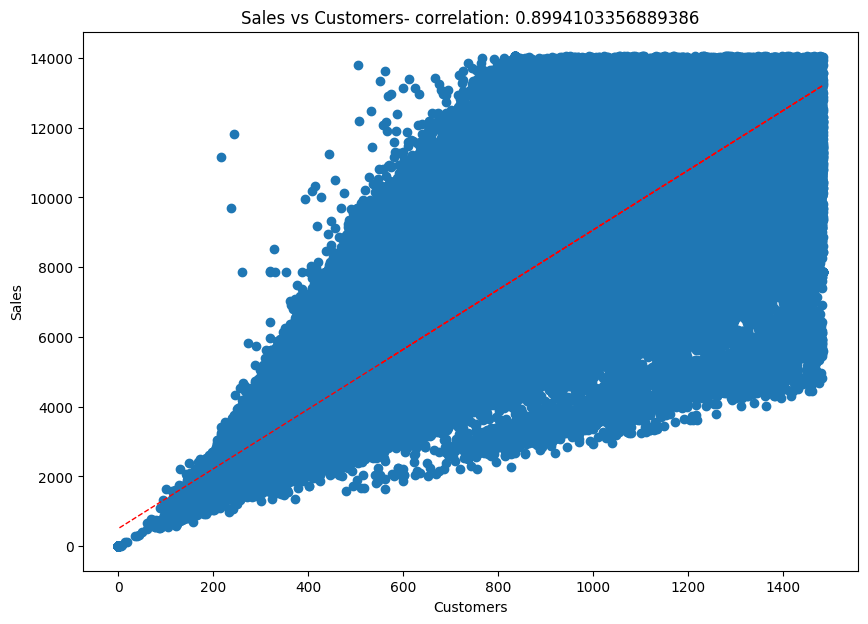

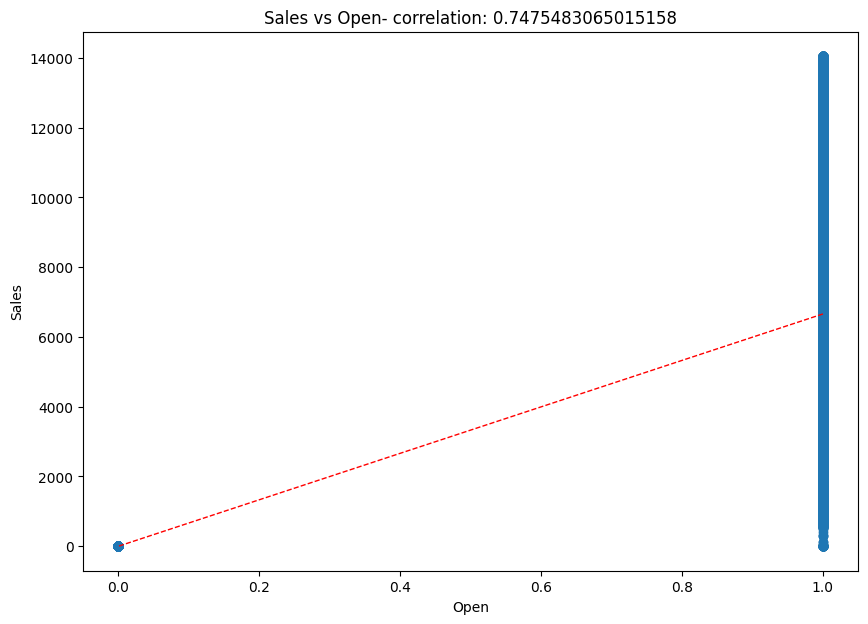

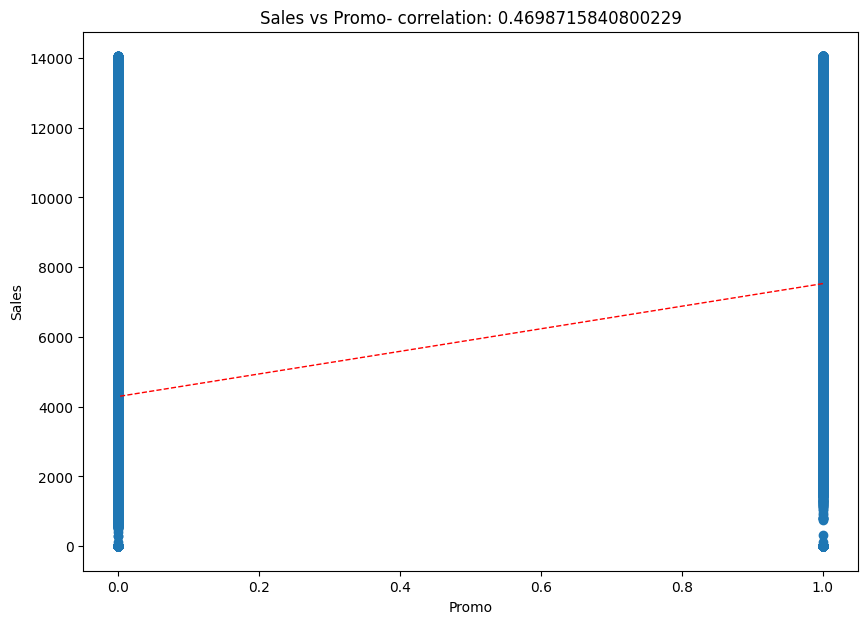

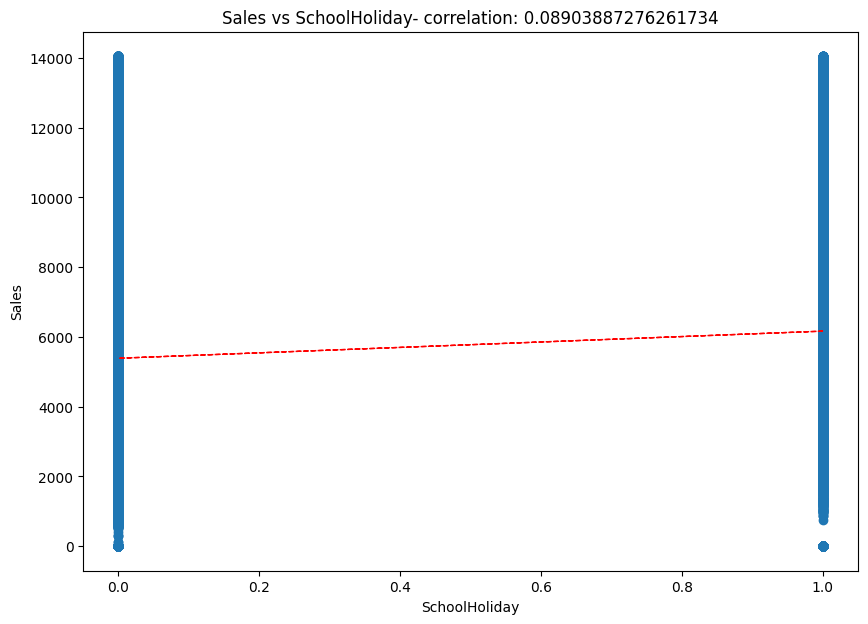

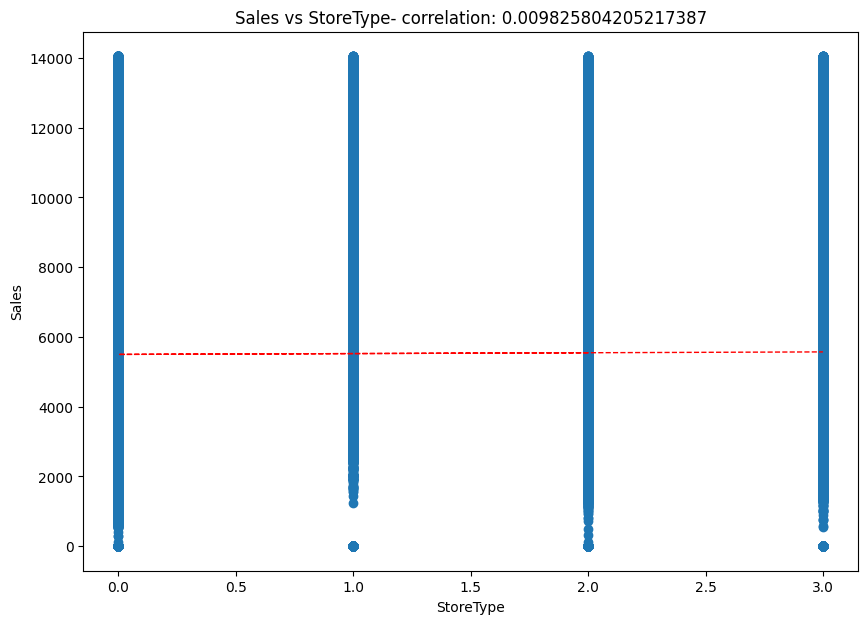

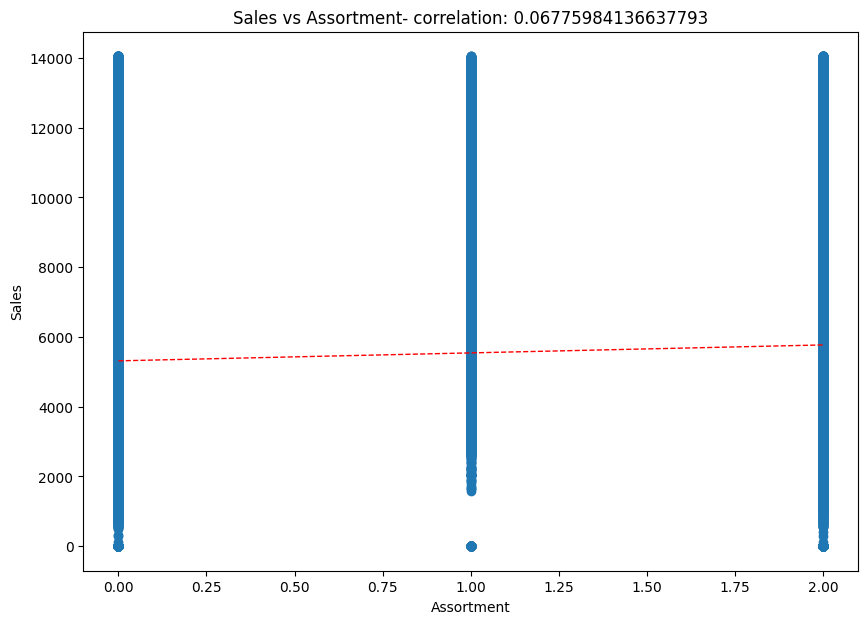

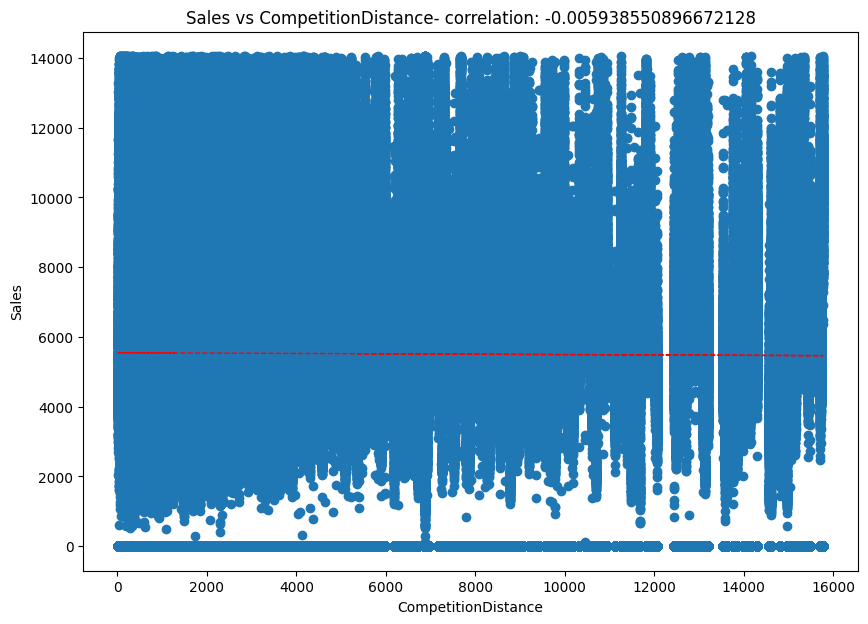

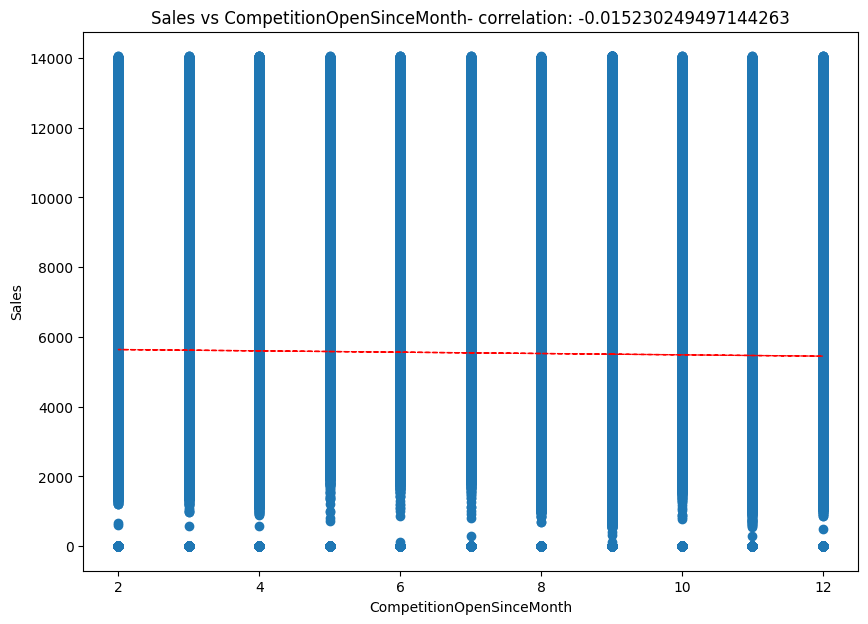

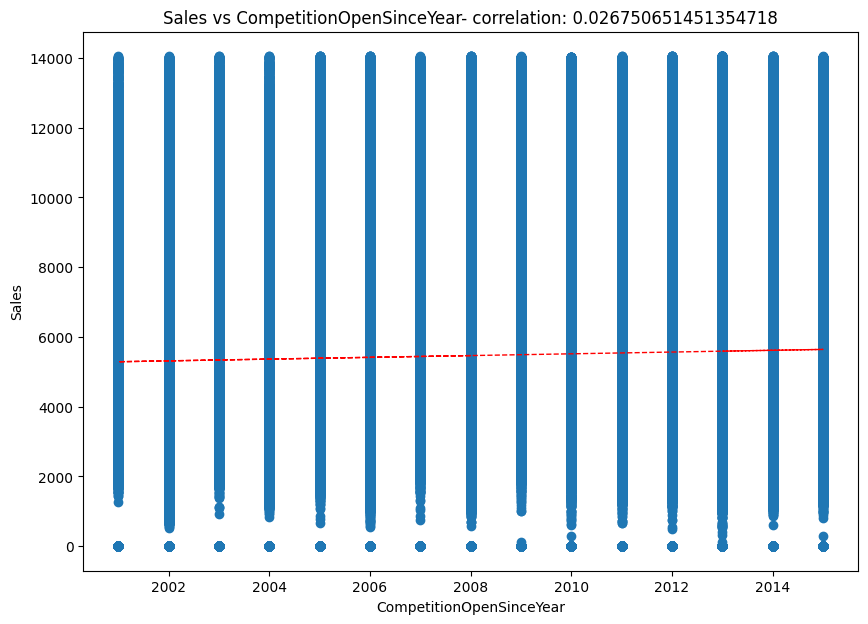

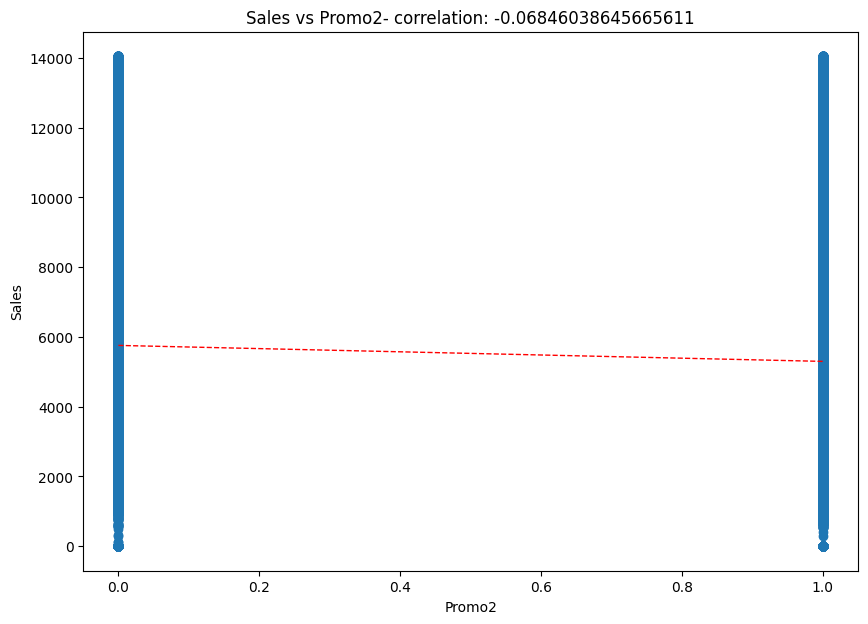

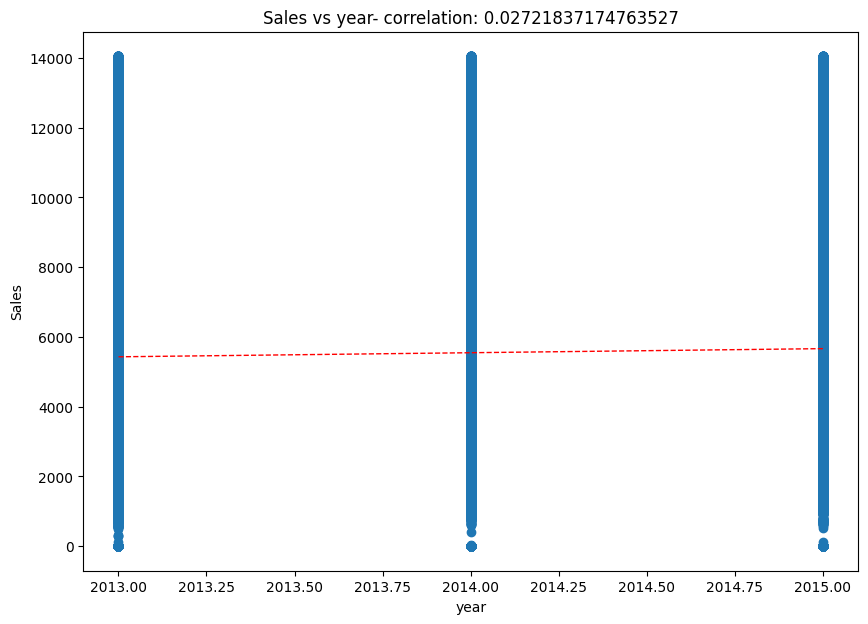

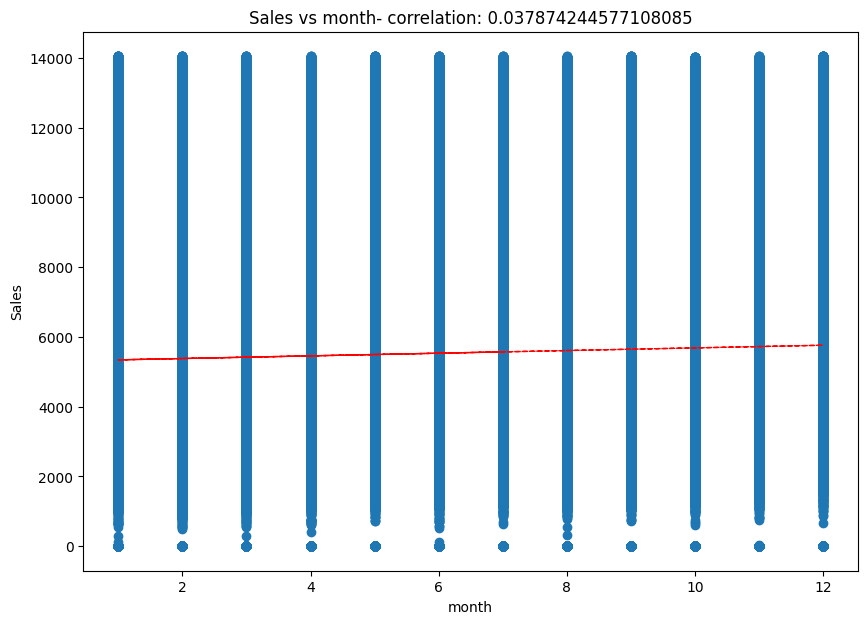

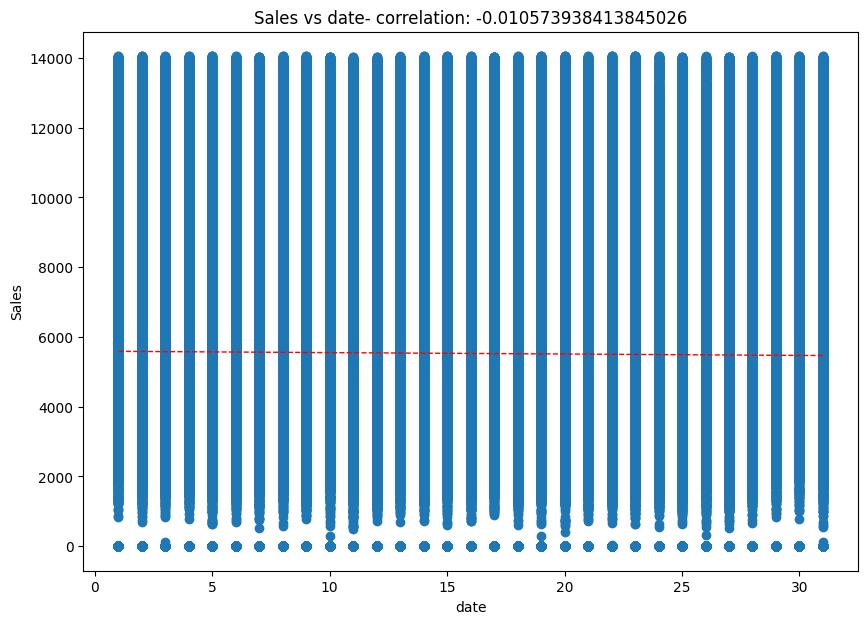

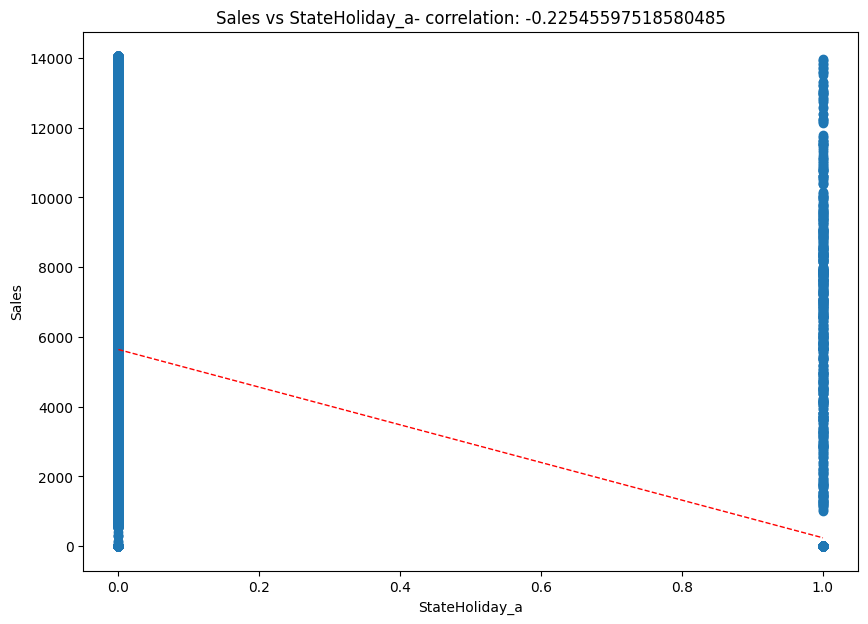

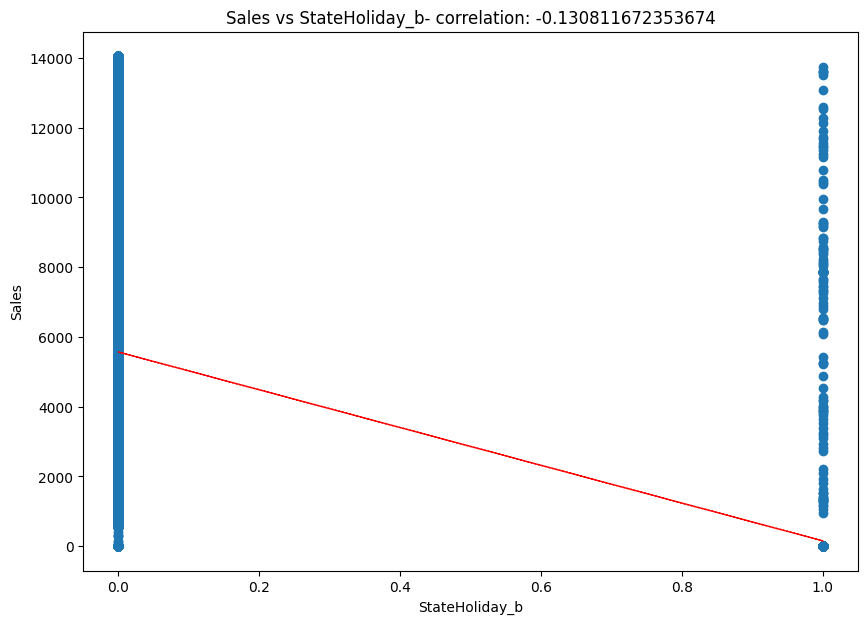

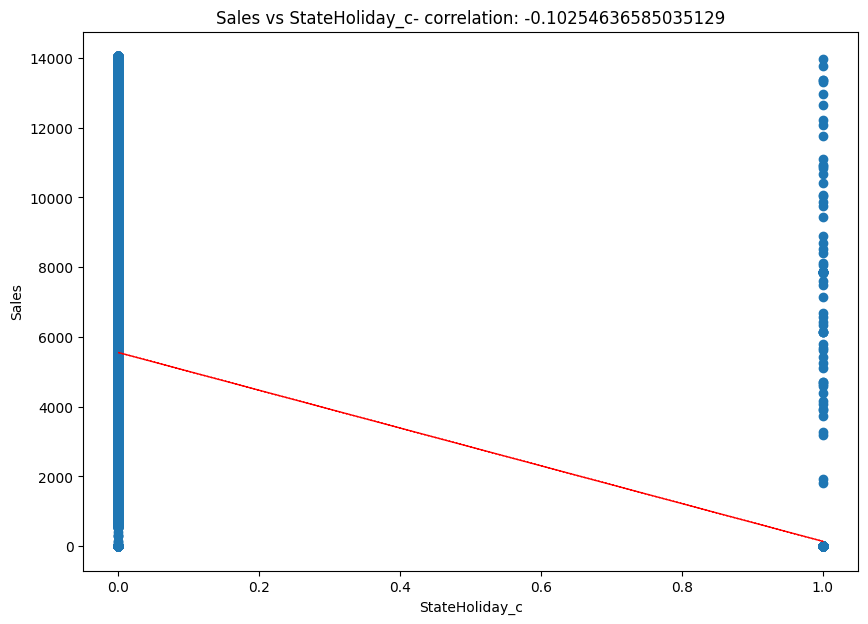

In [ ]:
for col in numerical_values:
  if col not in ['Sales', 'Store']:
   fig = plt.figure(figsize = (10,7))
   ax = fig.gca()
   feature = df[col]
   label = df['Sales']
   Correlation = feature.corr(label)
   plt.scatter (x= feature , y = label)
   plt.xlabel(col)
   plt.ylabel('Sales')
   ax.set_title('Sales vs ' + col + '- correlation: ' + str(Correlation))
   z = np.polyfit(df[col], df['Sales'], 1)
   y_hat = np.poly1d(z)(df[col])

   plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

<function matplotlib.pyplot.show(close=None, block=None)>

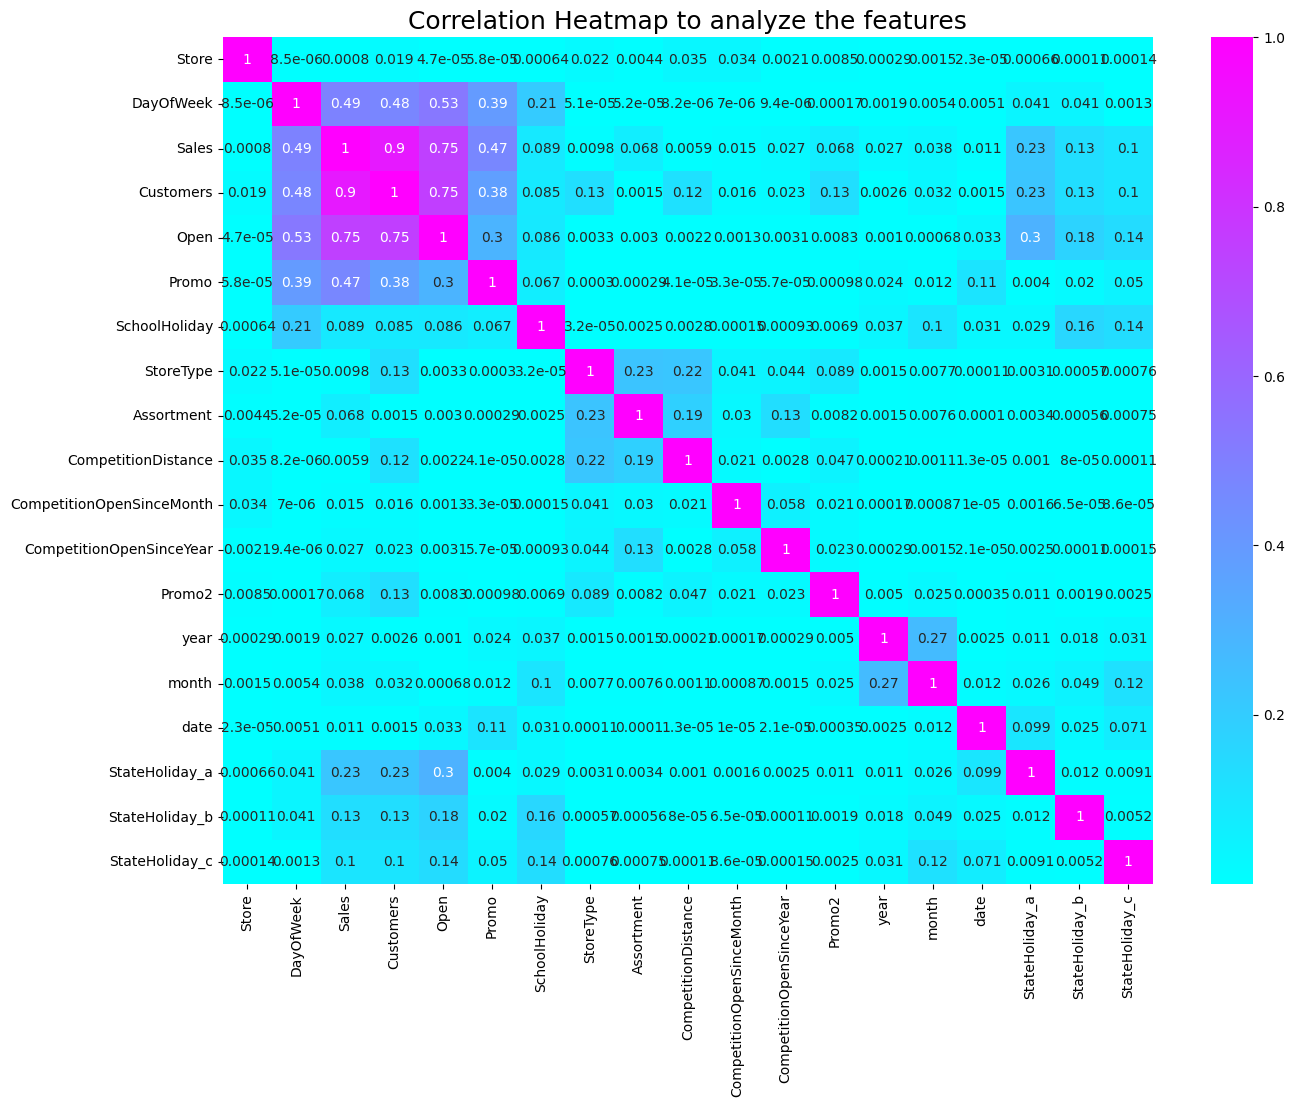

In [ ]:
plt.figure(figsize = (15,11))
sns.heatmap(abs(df.corr()), annot = True, cmap = 'cool').set_title('Correlation Heatmap to analyze the features', fontsize = 18)
plt.show


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variable"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values ,i) for i in range (X.shape[1])]

  return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variable,VIF
0,Store,4.023049
1,DayOfWeek,8.601597
2,Customers,10.503166
3,Open,17.835485
4,Promo,2.078084
5,SchoolHoliday,1.347443
6,StoreType,2.024900
7,Assortment,2.075134
8,CompetitionDistance,2.248656
9,CompetitionOpenSinceMonth,9.642168


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales', 'Open','CompetitionOpenSinceYear','year']]])

,variable,VIF
0,Store,3.709446
1,DayOfWeek,4.818818
2,Customers,4.642129
3,Promo,2.012838
4,SchoolHoliday,1.336920
5,StoreType,1.978876
6,Assortment,2.036314
7,CompetitionDistance,2.117148
8,CompetitionOpenSinceMonth,7.535913
9,Promo2,1.970803


##### What all feature selection methods have you used  and why?

variance inflation factor Method Because VIF measures the strength of the correlation between the independent variables in regression analysis.

##### Which all features you found important and why?

Which columns highly correlated with each variables those column we remove it.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

In [ ]:
indendent_var =df.columns.drop(['Sales', 'Open','CompetitionOpenSinceYear','year'])


In [ ]:
indendent_var

Index(['Store', 'DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'Promo2', 'month', 'date',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [ ]:
dependent_var = df['Sales']

In [ ]:
X = df[indendent_var]
y  = df[['Sales']]

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?
Ans.
We have used standard scaler method to scale our data. Standardizzing the data is important because features on different scale can lead to poor performance or slow convergence. Scaling the datas leads to compare the different features with the target variable by comparing the magnitude of its coefficient.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((813767, 15), (203442, 15), (813767, 1), (203442, 1))

##### What data splitting ratio have you used and why?

We have spilting Data set 80% to train set and 20 % to test set. We splitted the dataset into this ratio because our dataset is huge and contains nearly 10 lakh observations.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

Linear Regressions (algorithm)

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
# Importation of required libraries to measure the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train , y_train)

LinearRegression()

In [ ]:
Y_pred_train = Model.predict(X_train)
Y_pred_test = Model.predict(X_test)

In [ ]:
Model.score(X_train, y_train)

0.8524370862266215

In [ ]:
Model.coef_

array([[-1.17441117e-01, -6.40763638e+01,  7.98407526e+00,
         9.46357585e+02,  5.38189739e+01,  2.17422579e+02,
         1.10917811e+02,  6.27572034e-02, -7.32696557e+00,
         2.25497288e+02,  1.20987692e+01,  8.70559110e-01,
        -8.69872293e+02, -1.03922261e+03, -6.11283821e+02]])

In [ ]:
Model.intercept_

array([78.93632094])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn import metrics
def regression_metric (true, predicted):
  Mae = metrics.mean_absolute_error(true, predicted)
  Mse = metrics.mean_squared_error(true, predicted)
  Rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true, predicted)
  Mape = mean_absolute_percentage_error(true,predicted)*100
  Accuracy = 100 - Mape
  print('MAE:', Mae)
  print('MSE:', Mse)
  print('RMSE:', Rmse)
  print('MAPE',Mape)
  print('R2 Square', r2_square)
  print('Accuracy ', Accuracy ,'%')

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)

Train set
_________________
MAE: 895.1654857295399
MSE: 1652936.0703503413
RMSE: 1285.6656137387906
MAPE 29.30921017184989
R2 Square 0.8268928978365112
Accuracy  70.69078982815012 %
Test set 
_________________
MAE: 892.7948540444015
MSE: 1644860.6766456033
RMSE: 1282.5212187896166
MAPE 29.196166093189273
R2 Square 0.8271154020674981
Accuracy  70.80383390681072 %


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parmeter = {'alpha': [1e-15,1e-10,1e-6,1e-4,1e-1,1,10,20]}
lesso_regressor = GridSearchCV(lasso, parmeter , scoring = 'neg_mean_squared_error' , cv =3)
lesso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.499e+11, tolerance: 6.086e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.486e+11, tolerance: 6.080e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.466e+11, tolerance: 6.065e

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-06, 0.0001, 0.1, 1, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_train_lesso=lesso_regressor.predict(X_train)
y_pred_test_lesso=lesso_regressor.predict(X_test)

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)
print("The best fit alpha value is found out to be :" ,lesso_regressor.best_params_)
print("\nUsing ",lesso_regressor.best_params_, " the negative mean squared error is: ", lesso_regressor.best_score_)

Train set
_________________
MAE: 895.1654857295399
MSE: 1652936.0703503413
RMSE: 1285.6656137387906
MAPE 29.30921017184989
R2 Square 0.8268928978365112
Accuracy  70.69078982815012 %
Test set 
_________________
MAE: 892.7948540444015
MSE: 1644860.6766456033
RMSE: 1282.5212187896166
MAPE 29.196166093189273
R2 Square 0.8271154020674981
Accuracy  70.80383390681072 %
The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -1653050.3227717944


In [ ]:
# Creation of Ridge Instance
ridge= Ridge()

# Parameters
parameters = {'alpha': [17], 'max_iter':[2]}

# Train the model
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [17], 'max_iter': [2]},
             scoring='neg_mean_squared_error')

In [ ]:
Y_train_ridge_pred = ridge_reg.predict(X_train)
Y_test_ridge_pred = ridge_reg.predict(X_test)

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)
print("\nUsing ",ridge_reg.best_params_, " the negative mean squared error is: ", ridge_reg.best_score_)

Train set
_________________
MAE: 895.1654857295399
MSE: 1652936.0703503413
RMSE: 1285.6656137387906
MAPE 29.30921017184989
R2 Square 0.8268928978365112
Accuracy  70.69078982815012 %
Test set 
_________________
MAE: 892.7948540444015
MSE: 1644860.6766456033
RMSE: 1282.5212187896166
MAPE 29.196166093189273
R2 Square 0.8271154020674981
Accuracy  70.80383390681072 %
The best fit alpha value is found out to be : {'alpha': 17, 'max_iter': 2}

Using  {'alpha': 17, 'max_iter': 2}  the negative mean squared error is:  -1653050.6536696989


In [ ]:
e_net= ElasticNet()
elasticnet = ElasticNet(alpha = 0.1 , l1_ratio = 0.5)
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
Y_test_pred = elasticnet.predict(X_test)
Y_train_pred = elasticnet.predict(X_train)

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)

Train set
_________________
MAE: 895.1654857295399
MSE: 1652936.0703503413
RMSE: 1285.6656137387906
MAPE 29.30921017184989
R2 Square 0.8268928978365112
Accuracy  70.69078982815012 %
Test set 
_________________
MAE: 892.7948540444015
MSE: 1644860.6766456033
RMSE: 1282.5212187896166
MAPE 29.196166093189273
R2 Square 0.8271154020674981
Accuracy  70.80383390681072 %


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as hyperparameter optimization technique. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No Haven't Seen any kind of improvement while using rigde , lasso and elastic net model

### ML Model - 2

Decision Tree (algorithm)

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor(max_depth=15)
decision_tree.fit(X_train , y_train)


DecisionTreeRegressor(max_depth=15)

In [ ]:
Y_pred_test_dt = decision_tree.predict(X_test)
Y_pred_train_dt = decision_tree.predict(X_train)

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train_dt, y_train)

print('Test set \n_________________')
regression_metric(Y_pred_test_dt , y_test)

Train set
_________________
MAE: 449.48795453681754
MSE: 549582.632085494
RMSE: 741.3384059156075
MAPE 6.530244498660983
R2 Square 0.9484056170732719
Accuracy  93.46975550133902 %
Test set 
_________________
MAE: 482.4514775940778
MSE: 622285.8889848447
RMSE: 788.8509928908277
MAPE 7.047004300973065
R2 Square 0.9413047872601693
Accuracy  92.95299569902693 %


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
decision_tree= DecisionTreeRegressor()
parameter = {'max_depth': [18], 'min_samples_leaf': [5], 'min_samples_split': [3]}
dt_reg = GridSearchCV(decision_tree , parameter,scoring='neg_mean_squared_error', cv=3)
dt_reg.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [18], 'min_samples_leaf': [5],
                         'min_samples_split': [3]},
             scoring='neg_mean_squared_error')

In [ ]:
Y_train_dt_grid = dt_reg.predict(X_train)
Y_test_dt_grid =  dt_reg.predict (X_test)

In [ ]:
print('Train set\n_________________')
regression_metric(Y_train_dt_grid, y_train)
print('Test set \n_________________')
regression_metric(Y_test_dt_grid, y_test)
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)

Train set
_________________
MAE: 347.07400365145895
MSE: 371165.11090123607
RMSE: 609.2332155268917
MAPE 5.022044884924212
R2 Square 0.9657293360771668
Accuracy  94.97795511507579 %
Test set 
_________________
MAE: 406.3525167429514
MSE: 496887.5395754481
RMSE: 704.9025035956732
MAPE 5.923225320616625
R2 Square 0.953898108899623
Accuracy  94.07677467938338 %
The best fit alpha value is found out to be : {'alpha': 17, 'max_iter': 2}


In [ ]:
from yellowbrick.regressor import PredictionError

##### Which hyperparameter optimization technique have you used and why?

Here we use GridsearchCV as hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes we have seen improvement in R2 square of test . R2' square increase 0.9413 to 0.9538 and accuracy of model increase 92 % to 94% it's good .

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

We assess our ML model using several metrics in an effort to reduce the errors between real and projected values. All of these indicators aim to show us how near we are to the actual or anticipated output. Each evaluation parameter in our situation indicates a very little difference between the train and test data, indicating that our model is projecting a predicted value that is fairly near to the actual value. Therefore, the dependent variable, sales, which has an influence on the business, is correctly predicted to the extent of 94% and 6% away from the mean of actual absolute values.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train_with_coumns = X_train

In [ ]:
rand_for = RandomForestRegressor (n_estimators=100, max_depth=16)
rand_for.fit(X_train, y_train)

<ipython-input-151-f72e1af5dda1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_for.fit(X_train, y_train)


RandomForestRegressor(max_depth=16)

In [ ]:
train_rand_for_pre = rand_for.predict(X_train)
test_rand_for_pre = rand_for.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train set\n_________________')
regression_metric(train_rand_for_pre, y_train)
print('Test set \n_________________')
regression_metric(test_rand_for_pre, y_test)

Train set
_________________
MAE: 365.9806637533994
MSE: 371604.15455061605
RMSE: 609.5934338152077
MAPE 5.284586343210207
R2 Square 0.964937869360602
Accuracy  94.71541365678979 %
Test set 
_________________
MAE: 402.2885629307447
MSE: 449666.8946620143
RMSE: 670.5720652264113
MAPE 5.832066041989973
R2 Square 0.9573202974441497
Accuracy  94.16793395801002 %


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [ ]:
rand_f = RandomForestRegressor()
parameters= {'n_estimators':[100], 'max_depth': [20], 'min_samples_leaf': [3]}
rand_f = GridSearchCV(rand_f, parameters, n_jobs= 1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
rand_f.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, min_samples_leaf=3, n_estimators=100;, score=-358750.913 total time= 4.3min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, min_samples_leaf=3, n_estimators=100;, score=-366611.230 total time= 4.6min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, min_samples_leaf=3, n_estimators=100;, score=-370234.753 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [20], 'min_samples_leaf': [3],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
train_rand_f_pred = rand_f.predict(X_train)
test_rand_f_pred = rand_f.predict(X_test)

In [ ]:
print('Train set\n_________________')
regression_metric(train_rand_f_pred, y_train)
print('Test set \n_________________')
regression_metric(test_rand_f_pred, y_test)
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)

Train set
_________________
MAE: 256.680209550091
MSE: 212838.34495135254
RMSE: 461.3440635267268
MAPE 3.7105817296221177
R2 Square 0.9802886909383667
Accuracy  96.28941827037788 %
Test set 
_________________
MAE: 331.3657480713187
MSE: 346059.8961884309
RMSE: 588.2685578784836
MAPE 4.823520608897079
R2 Square 0.9676920755658528
Accuracy  95.17647939110292 %
The best fit alpha value is found out to be : {'alpha': 17, 'max_iter': 2}


##### Which hyperparameter optimization technique have you used and why?

Here we use GridsearchCV as hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes we have seen improvement to using gridsearchCv hypermeter optimization technique lots of increment of model of r2 square metric test 94 to 96 it's quite good model because  we avoid overfiting model and accuracy increment 94 to 95 it's to good .

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
reg_metrics = ['Linear_regression', 'Decision_tree','Random_forest']
MAE_reg = [892.79,406.25 , 331.48]
MSE_reg = [1644860,496526,212666]
RMSE_reg = [1282.52,704.64,461.15]
MAPE_reg = [29.19,5.92, 4.82]
r2_reg = [0.82,0.95,0.96]
accuracy_reg = [70,94,95]

data ={'Model':reg_metrics,
       'MAE':MAE_reg,
       'MSE':MSE_reg,
       'RMSE':RMSE_reg,
       'MAPE':MAPE_reg,
       'R2':r2_reg ,
       'Accuracy':accuracy_reg}
Metric_score = pd.DataFrame(data)

In [ ]:
Metric_score

,Model,MAE,MSE,RMSE,MAPE,R2,Accuracy
0,Linear_regression,892.79,1644860,1282.52,29.19,0.82,70
1,Decision_tree,406.25,496526,704.64,5.92,0.95,94
2,Random_forest,331.48,212666,461.15,4.82,0.96,95


we will select random forest for our final predict because it give us the accurate model (95) accuracy of our model.

### 2. Explain the model which you have used and the feature importance using any model explainability tool?

Text(0.5, 0, 'Relative Importance')

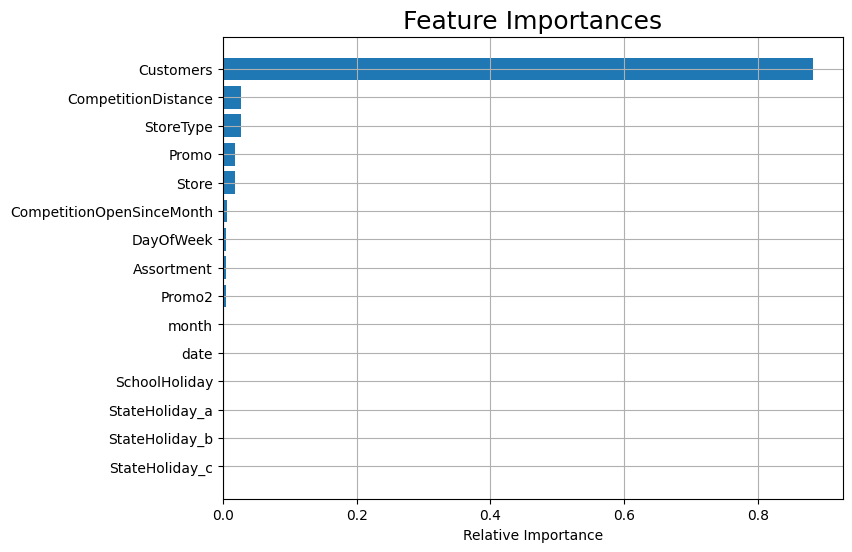

In [ ]:
features = X_train_with_coumns.columns
importances = rand_for.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (8,6))
plt.grid(zorder = 0)
plt.title('Feature Importances', fontsize = 18)
plt.barh(range(len(indices)),  importances[indices],align = 'center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### **EDA Conclusion**

We originally performed EDA on each feature of our datset over the course of our investigation. Sales, our dependent variable, was first analyzed and converted. Next, we examined categorical variables and eliminated those that were dominated by a single class. We also examined numerical variables and used the corr() Function to determine their correlation, distribution, and relationship to the dependent variable. Finally, for multicollinearity, we used the VIF Function that we had developed. Additionally, we hot encoded the categorical variables and deleted several numerical characteristics with a large percentage of 0 values.

* As my observation Sales are highest during three month of the year i.e.,July, November and December and least sales are during the month of May.
* Sales increases year by year because of stores gives discount on productst.
*  When School is closes Some stores sales droping but B type of store no effect on sales when school open or close.
*  Mostly Sales of B type of Assortment (Extra things).
* Sales are maximum during the Public Holidays, where are during the religious occassions, like Easter or Christmas, the sales are lower , most of sales of B type assortment of all Holiday.
*  As my ovservation the highest sales belonged to the store type A due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.

# Conclusion Ml Models

We Used three types of Machin learning algorithm for best prediction Linear Regressions, Decision Tree and Hyperparmeter techniques.

 First we start with Linear Regression we have approx 70% accuracy  and R2 0.82 on test data but this is not upto the mark. So for more accuracy we moved further with more complex model i.e., Decision Tree.

 On test data, this model has an almost 94%  accuracy rate or R2 0.95 , which is better than the linear regression model. But in order to ensure your happiness, we also ran a Random Forest Regressor model.

 We achieved around 95% accuracy or R2 0.96 on test data with our model, which is an improvement over the prior model.

 The best outcome is being produced by the Random Forest Regressor. So, in order to forecast our model, we will utilize Random Forest Regressor.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***